In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import pearsonr
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
df=pd.read_csv('../DataSets/Airbnb_Open_Data.csv')
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [3]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     


# Id

In [4]:
df=df.rename(columns={'id': 'Id'})

In [5]:
df.Id.nunique()

102058

In [6]:
df.Id.dtype

dtype('int64')

In [7]:
df.Id.isnull().sum()

0

In [8]:
duplicate_rows = df[df.duplicated(subset=["Id"], keep=False)]
print(f"Total : {len(duplicate_rows)}")
duplicate_rows

Total : 1082


,Id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,US,False,moderate,Entire home/apt,2008.0,$105,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN
9099,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,US,False,moderate,Entire home/apt,2008.0,$285,$57,30.0,6.0,1/31/2019,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN
9100,6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,United States,US,False,moderate,Entire home/apt,2014.0,$586,$117,30.0,10.0,11/18/2018,0.22,5.0,34.0,211.0,No Smoking No Pets,NaN
9101,6027818,*ENCHANTMENT* Upper East Side 2 bedroom- Sunny!,73401481508,unconfirmed,Juliana,Manhattan,Upper East Side,40.76244,-73.96031,United States,US,True,moderate,Entire home/apt,2006.0,$539,$108,30.0,9.0,9/30/2018,0.20,5.0,34.0,411.0,Please treat it as it were your own home and b...,NaN
9102,6028371,*JAMES* Amazing Spacious 2 Bedroom- Bright!,37678424985,verified,Juliana,Manhattan,Upper East Side,40.76035,-73.96133,United States,US,False,flexible,Entire home/apt,2021.0,$806,$161,30.0,8.0,6/11/2019,0.27,4.0,34.0,411.0,Be courteous and respectful to people in the h...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [9]:
df = df.drop_duplicates(subset=["Id"])

In [10]:
df[df.duplicated(subset=["Id"], keep=False)]

,Id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [11]:
df = df[df["Id"] > 0]

# Name

In [12]:

df.NAME.dtype


dtype('O')

In [13]:


df.NAME.isnull().sum()

250

In [14]:
null_Name_rows = df[df["NAME"].isnull()]
print(f"Total rows with missing 'id': {len(null_Name_rows)}")
null_Name_rows

Total rows with missing 'id': 250


,Id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
57,1032817,NaN,18424415847,unconfirmed,Carina,Manhattan,Lower East Side,40.72004,-73.99104,United States,US,True,flexible,Private room,2009.0,"$1,024",$205,5.0,19.0,5/18/2019,0.17,4.0,1.0,NaN,NaN,NaN
58,1033369,NaN,48877238684,NaN,Sophia,Manhattan,Hell's Kitchen,40.75531,-73.99293,United States,US,True,strict,Private room,2006.0,$658,$132,2.0,289.0,6/9/2019,2.49,3.0,2.0,NaN,NaN,NaN
59,1033922,NaN,71987706184,verified,Rosie,Brooklyn,Greenpoint,40.72401,-73.93788,United States,US,False,flexible,Private room,2020.0,$543,$109,4.0,138.0,6/4/2019,1.19,1.0,3.0,NaN,No smoking.,NaN
60,1034474,NaN,85649449746,verified,Frederick,Manhattan,SoHo,40.72210,-73.99775,United States,US,True,strict,Entire home/apt,2019.0,$256,$51,30.0,21.0,6/29/2019,0.30,5.0,1.0,NaN,Quietly please. I am on the top floor and hav...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100074,56272206,NaN,19395911932,unconfirmed,Alex,Queens,Astoria,40.75989,-73.91343,United States,US,True,strict,Entire home/apt,2006.0,$752,$150,21.0,6.0,1/19/2018,0.19,2.0,1.0,0.0,Please leave the apartment in the same conditi...,NaN
100085,56278282,NaN,24411362869,unconfirmed,Elisia,Manhattan,Harlem,40.80891,-73.94247,United States,US,True,moderate,Entire home/apt,2015.0,$725,$145,2.0,113.0,6/23/2019,3.55,2.0,1.0,297.0,- NO SMOKING (You'll have to do that outside i...,NaN
100294,56393712,NaN,87823753249,verified,Irisha,Queens,Fresh Meadows,40.74271,-73.78749,United States,US,True,moderate,Entire home/apt,2016.0,"$1,043",$209,1.0,18.0,5/2/2019,0.60,1.0,3.0,173.0,NaN,NaN
100312,56403654,NaN,36683367732,verified,Emmy,Queens,Flushing,40.76153,-73.80304,United States,US,False,flexible,Private room,2022.0,$208,$42,1.0,69.0,2/27/2019,2.19,4.0,4.0,0.0,NaN,NaN


In [15]:
df = df.dropna(subset=["NAME"])

In [16]:
df.NAME.isnull().sum()

0

In [17]:
duplicate_rows1 = df[df.duplicated(subset=["NAME"], keep=False)]
print(f"Total Rows with missing  : {len(duplicate_rows1)}")
duplicate_rows1

Total Rows with missing  : 69112


,Id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,NaN,NaN,moderate,Entire home/apt,2009.0,$778,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
32,1019010,Spacious 1 bedroom in luxe building,80369762211,verified,Mary,Manhattan,Harlem,40.81305,-73.95466,United States,NaN,NaN,flexible,Private room,2007.0,$512,$102,2.0,88.0,6/14/2019,1.42,NaN,1.0,169.0,NaN,NaN
35,1020667,Large B&B Style rooms,57938703679,unconfirmed,Jared,Brooklyn,Bedford-Stuyvesant,40.68310,-73.95473,United States,US,True,strict,Private room,2016.0,$191,$38,1.0,74.0,5/12/2019,0.66,NaN,2.0,76.0,"No smoking, this is non-negotiable. No illega...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,$848,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [18]:
df.columns = df.columns.str.strip()
df.columns

Index(['Id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [19]:
df=df.rename(columns={'NAME': 'Name'})

# Host Id

In [20]:
df=df.rename(columns={'host id': 'Host_id'})

In [21]:
missing_host_ids = df["Host_id"].isnull().sum()
print(f"Number of missing host IDs: {missing_host_ids}")

Number of missing host IDs: 0


In [22]:
df.columns

Index(['Id', 'Name', 'Host_id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [23]:
df.Host_id.dtypes

dtype('int64')

In [24]:
duplicate_rows1 = df[df.duplicated(subset=["Host_id"], keep=False)]
print(f"Total Rows with missing Host_id : {len(duplicate_rows1)}")
duplicate_rows1

Total Rows with missing Host_id : 0


,Id,Name,Host_id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


# host_identity_verified

In [25]:
df=df.rename(columns={'host_identity_verified': 'Host_Identity_Verified'})

In [26]:
df.Host_Identity_Verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [27]:
null_host_id_v_rows = df[df["Host_Identity_Verified"].isnull()]
print(f"Total rows with missing Host_Identity_Verified : {len(null_host_id_v_rows)}")
null_host_id_v_rows

Total rows with missing Host_Identity_Verified : 277


,Id,Name,Host_id,Host_Identity_Verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
19,1011830,Hip Historic Brownstone Apartment with Backyard,72145018858,NaN,Martin,Brooklyn,Crown Heights,40.67592,-73.94694,United States,NaN,NaN,moderate,Entire home/apt,2004.0,"$1,095",NaN,3.0,53.0,6/22/2019,4.44,5.0,1.0,345.0,LAUNDRY - Laundry can be done by the visitor b...,NaN
23,1014039,CBG Helps Haiti Room#2.5,87668933180,NaN,William,Brooklyn,Park Slope,40.67989,-73.97798,United States,NaN,NaN,moderate,Private room,2017.0,"$1,050",$210,1.0,39.0,1/1/2019,0.37,3.0,6.0,9.0,NaN,NaN
25,1015144,"MAISON DES SIRENES1,bohemian apartment",48387947293,NaN,Miranda,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,United States,NaN,NaN,strict,Entire home/apt,2006.0,"$1,175",$235,2.0,88.0,6/19/2019,0.73,4.0,2.0,372.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96336,54207709,Ma-Don Hideaway,73975905498,NaN,Lillie & Donald,Brooklyn,Bedford-Stuyvesant,40.69069,-73.92651,United States,US,True,moderate,Entire home/apt,2017.0,"$1,092",$218,2.0,13.0,1/2/2019,1.26,2.0,1.0,1.0,NaN,NaN
96337,54208261,Gorgeous room in luxury apartment (2),50042663518,NaN,Jelani,Brooklyn,Clinton Hill,40.68697,-73.96063,United States,US,False,moderate,Private room,2005.0,$536,$107,3.0,10.0,6/5/2019,0.87,3.0,2.0,150.0,please be quiet and respectful of the other re...,NaN
96338,54208813,The Yorkville Gem,16811944489,NaN,Janine,Manhattan,Upper East Side,40.78023,-73.95069,United States,US,False,flexible,Shared room,2003.0,$320,$64,7.0,15.0,7/1/2019,3.46,2.0,1.0,4.0,"Enjoy your stay in our home, simply be respect...",NaN
96339,54209366,1940's Historic Brooklyn Townhome,73143337197,NaN,Mark,Brooklyn,East Flatbush,40.63863,-73.93826,United States,US,False,moderate,Entire home/apt,2012.0,$597,$119,5.0,2.0,6/19/2019,0.81,4.0,1.0,174.0,No Smoking No Pets,NaN


In [28]:
df["Host_Identity_Verified"] = df["Host_Identity_Verified"].fillna("unconfirmed")

In [29]:
df[["Host_Identity_Verified"]].head()

,Host_Identity_Verified
0,unconfirmed
1,verified
2,unconfirmed
4,verified
5,verified


In [30]:
df.Host_Identity_Verified.unique()

array(['unconfirmed', 'verified'], dtype=object)

# host name

In [31]:
df=df.rename(columns={'host name': 'host_name'})

In [32]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [33]:
missing_host_names = df["host_name"].isnull().sum()
print(f"Number of missing host names: {missing_host_names}")

Number of missing host names: 398


In [34]:
df["host_name"] = df["host_name"].fillna("Unknown Host")

In [35]:
df["host_name"] = df["host_name"].str.strip().str.title()
#.str.strip() → Removes leading and trailing spaces from each listing name
#.str.title() → Converts the text to Title Case (first letter of each word capitalized).

In [36]:
df[["host_name"]].head()

,host_name
0,Madaline
1,Jenna
2,Elise
4,Lyndon
5,Michelle


In [37]:
df.host_name.dtype

dtype('O')

In [38]:
print(df["host_name"].value_counts().head(10))


host_name
Michael         877
David           759
John            576
Alex            541
Sonder (Nyc)    515
Daniel          468
Karen           436
Sarah           428
Maria           420
Unknown Host    398
Name: count, dtype: int64


# neighbourhood group	

In [39]:
df=df.rename(columns={'neighbourhood group': 'Neighbourhood_group'})

In [40]:
df.columns


Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [41]:
df.Neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [42]:
df["Neighbourhood_group"] = df["Neighbourhood_group"].replace("brookln", "Brooklyn")
df["Neighbourhood_group"] = df["Neighbourhood_group"].replace("manhatan", "Manhattan")


In [43]:
df.Neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [44]:
null_neigrp = df[df["Neighbourhood_group"].isnull()]
print(f"Total rows with missing Host_Identity_Verified : {len(null_neigrp)}")
null_neigrp

Total rows with missing Host_Identity_Verified : 27


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
74,1042206,"HARLEM, NEW YORK WELCOMES YOU!!",98195975718,unconfirmed,Violet,NaN,Washington Heights,40.83139,-73.94095,United States,US,True,moderate,Private room,2011.0,$571,$114,2.0,49.0,6/18/2019,1.60,2.0,2.0,NaN,The usual courtesies apply: - No smoking - No ...,NaN
75,1042759,BLUE TRIM GUEST HOUSE,4726877402,unconfirmed,Audrey,NaN,Clinton Hill,40.68346,-73.96374,United States,US,True,strict,Private room,2014.0,$398,$80,2.0,105.0,6/26/2019,0.92,1.0,1.0,NaN,Shoes off please Cat can go in or out as he de...,NaN
76,1043311,Charming East Village One Bedroom Flat,74322993447,verified,Violet,NaN,East Village,40.72828,-73.98801,United States,US,False,strict,Entire home/apt,2018.0,$618,$124,5.0,21.0,1/2/2019,0.20,4.0,1.0,NaN,no smoking quiet,NaN
77,1043863,Manhattan Room,11468499446,verified,Sofia,NaN,Upper East Side,40.76865,-73.95058,United States,US,False,strict,Private room,2007.0,$116,$23,1.0,142.0,7/6/2019,1.50,4.0,1.0,NaN,I'm a semi kosher vegetarian which means that ...,NaN
78,1044415,Little King of Queens,68599531533,unconfirmed,Melanie,NaN,Woodside,40.75038,-73.90334,United States,US,True,flexible,Private room,2012.0,$54,$11,30.0,25.0,NaN,0.22,2.0,1.0,NaN,No Street Shoes allowed in House. No cooking K...,NaN
90,1051043,Cozy Bedroom in Williamsburg 3 BR,14067827221,unconfirmed,Lilianna,NaN,Williamsburg,40.71156,-73.96218,United States,US,False,moderate,Private room,2015.0,$266,$53,3.0,174.0,6/22/2019,1.54,5.0,4.0,NaN,Dryer and Washing Machine are in Basement (1.0...,NaN
91,1051595,Sunny room+Pvte office in huge loft,12884105458,unconfirmed,Albert,NaN,Bushwick,40.70032,-73.93830,United States,US,False,moderate,Private room,2012.0,$728,$146,4.0,24.0,NaN,0.28,5.0,1.0,NaN,"To enjoy, relax, feel safe and cozy. Also, kee...",NaN
92,1052148,Spacious Prospect Heights Apartment,63218812094,unconfirmed,Sarah,NaN,Prospect Heights,40.68233,-73.97261,United States,US,False,flexible,Entire home/apt,2021.0,$583,$117,4.0,166.0,6/27/2019,3.40,2.0,1.0,NaN,We ask that guests be respectful as there are ...,NaN
148,1083076,NYC Zen,83696952551,verified,Amelia,NaN,East Village,40.72354,-73.98295,United States,US,False,strict,Entire home/apt,2003.0,NaN,$119,3.0,30.0,6/17/2019,0.28,5.0,1.0,344.0,No Smoking No Pets No Parties,NaN
161,1090256,Indie-Chic Share In Williamsburg,1595619477,unconfirmed,Darcy,NaN,Williamsburg,40.71088,-73.95055,NaN,NaN,NaN,NaN,Private room,2022.0,"$1,020",$204,4.0,202.0,5/28/2019,1.86,5.0,2.0,377.0,"No smoking in the apartment, even with the win...",NaN


In [45]:
missing_neighbourhoods = df[df["Neighbourhood_group"].isna()]
print(missing_neighbourhoods[["lat", "long", "Neighbourhood_group"]])

            lat      long Neighbourhood_group
74     40.83139 -73.94095                 NaN
75     40.68346 -73.96374                 NaN
76     40.72828 -73.98801                 NaN
77     40.76865 -73.95058                 NaN
78     40.75038 -73.90334                 NaN
90     40.71156 -73.96218                 NaN
91     40.70032 -73.93830                 NaN
92     40.68233 -73.97261                 NaN
148    40.72354 -73.98295                 NaN
161    40.71088 -73.95055                 NaN
168    40.68843 -73.96408                 NaN
196    40.74859 -73.99671                 NaN
241    40.80942 -73.93936                 NaN
249    40.68800 -73.91710                 NaN
262    40.88057 -73.83572                 NaN
287    40.71031 -73.95830                 NaN
295    40.82976 -73.94867                 NaN
319    40.71398 -73.95763                 NaN
361    40.72413 -73.76133                 NaN
384    40.82399 -73.95328                 NaN
415    40.71363 -73.96019         

In [46]:

manual_neighbourhoods = {
    "Brooklyn": (40.7, -73.9),
    "Manhattan": (40.6, -74.0),
    "Queens": (40.8, -73.95),
    "Bronx": (40.8448, -73.8648),
    "Staten Island": (40.5795, -74.1502)
}


def assign_neighbourhood(lat, lon):
    for neighborhood, (n_lat, n_lon) in manual_neighbourhoods.items():
        if np.isclose(lat, n_lat, atol=0.02) and np.isclose(lon, n_lon, atol=0.02):  # Allows small variations
            return neighborhood
    return np.nan  

df.loc[df["Neighbourhood_group"].isna(), "Neighbourhood_group"] = df.apply(
    lambda row: assign_neighbourhood(row["lat"], row["long"]) if pd.isna(row["Neighbourhood_group"]) else row["Neighbourhood_group"],
    axis=1
)

print(f"Remaining missing values in 'neighbourhood group': {df['Neighbourhood_group'].isna().sum()}")


Remaining missing values in 'neighbourhood group': 20


In [47]:
df.Neighbourhood_group.isnull().sum()

20

In [48]:
df = df.dropna(subset=["Neighbourhood_group"])

In [49]:
df.Neighbourhood_group.isnull().sum()

0

# neighbourhood

In [50]:
df.neighbourhood.nunique()

224

In [51]:
null_nei= df[df["neighbourhood"].isnull()]
print(f"Total rows with missing Neighbourhood : {len(null_nei)}")
null_nei

Total rows with missing Neighbourhood : 16


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
517,1286875,"""The Oasis"" on Bedford Williamsburg",30603782652,unconfirmed,Lucas,Brooklyn,NaN,40.71580,-73.95803,NaN,NaN,NaN,NaN,Entire home/apt,2005.0,NaN,$130,6.0,1.0,1/1/2016,0.02,5.0,1.0,266.0,1. No parties. 2. Respect the neighbors. Nois...,NaN
547,1303444,STYLISH EAST VILLAGE FLAT,6825076306,verified,Arnold,Manhattan,NaN,40.73089,-73.98195,United States,US,True,strict,Entire home/apt,2013.0,$749,$150,30.0,25.0,4/30/2018,0.26,4.0,1.0,67.0,NaN,NaN
553,1306758,Comfortable. Spacious. Private Room.,45534966158,unconfirmed,Ned,Manhattan,NaN,40.71300,-73.99752,United States,US,True,flexible,Private room,2019.0,$613,$123,NaN,172.0,7/2/2019,1.84,5.0,2.0,63.0,Please be gentle with the furniture and applia...,NaN
575,1318909,"2 Bed, 2 Bath Apartment on Central Park West",86633710982,unconfirmed,Arthur,Manhattan,NaN,40.79816,-73.96190,United States,US,True,strict,Entire home/apt,2014.0,$892,$178,2.0,45.0,4/22/2019,0.47,4.0,3.0,4.0,NaN,NaN
589,1326641,CBG Helps Haiti Rm #3,33952991254,verified,Jacob,Brooklyn,NaN,40.68012,-73.97847,United States,US,False,strict,Private room,2003.0,$793,$159,2.0,23.0,9/15/2018,0.24,1.0,6.0,NaN,Please remember that this is a residential bui...,NaN
613,1339896,Wonderfully inviting East Village,84560895335,verified,Carter,Manhattan,NaN,40.72709,-73.98274,United States,US,True,moderate,Private room,2004.0,$486,$97,1.0,109.0,10/2/2015,1.15,2.0,1.0,116.0,#NAME?,NaN
624,1345971,Stylish Studio with exclusive Terrace,21547822804,unconfirmed,Cole,Manhattan,NaN,40.75348,-73.97065,United States,US,False,moderate,Entire home/apt,2019.0,$417,$83,30.0,136.0,6/19/2019,1.45,4.0,1.0,272.0,Please remember that this is a residential bui...,NaN
633,1350942,Lower East Side/Chinatown 1 Bedroom,58408401042,verified,Higgins,Manhattan,NaN,40.71693,-73.98948,United States,US,False,flexible,Entire home/apt,2017.0,"$1,148",$230,5.0,8.0,5/18/2018,0.11,3.0,1.0,42.0,NaN,NaN
643,1356465,2BR Apt - 20min to Soho,21192497123,verified,Barrett,Brooklyn,NaN,40.68016,-73.94878,United States,US,False,moderate,Entire home/apt,2015.0,$938,$188,3.0,5.0,7/9/2017,0.05,2.0,1.0,408.0,Smoking is allowed on the patio only. No pets ...,NaN
670,1371377,Loft Suite @ The Box House Hotel,75427375884,verified,Gray,Brooklyn,NaN,40.73641,-73.95330,United States,US,False,strict,Entire home/apt,2006.0,$104,$21,3.0,24.0,11/6/2018,0.32,4.0,28.0,419.0,NaN,NaN


In [52]:
df["neighbourhood"] = df["neighbourhood"].fillna("Unknown")

In [53]:
df.neighbourhood.isnull().sum()

0

# lat and long

In [54]:
null_lat= df[df["lat"].isnull()]
print(f"Total rows with missing latitude : {len(null_lat)}")
null_lat

Total rows with missing latitude : 8


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,NaN,NaN,United States,US,False,strict,Private room,NaN,$539,$108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,NaN,NaN,United States,US,False,strict,Entire home/apt,2021.0,"$1,058",$212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,United States,US,False,flexible,Private room,2010.0,$506,$101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,United States,US,True,strict,Entire home/apt,2003.0,$381,$76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,United States,US,True,strict,Private room,2005.0,$224,$45,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN
885,1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,NaN,NaN,United States,US,True,flexible,Private room,2019.0,$524,$105,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN
926,1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,NaN,NaN,United States,US,False,strict,Private room,2020.0,$623,$125,21.0,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN
986,1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,NaN,NaN,United States,US,True,flexible,Private room,2014.0,$413,$83,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN


In [55]:
null_long= df[df["long"].isnull()]
print(f"Total rows with missing latitude : {len(null_long)}")
null_long

Total rows with missing latitude : 8


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,NaN,NaN,United States,US,False,strict,Private room,NaN,$539,$108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,NaN,NaN,United States,US,False,strict,Entire home/apt,2021.0,"$1,058",$212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,United States,US,False,flexible,Private room,2010.0,$506,$101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,United States,US,True,strict,Entire home/apt,2003.0,$381,$76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN
843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,United States,US,True,strict,Private room,2005.0,$224,$45,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN
885,1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,NaN,NaN,United States,US,True,flexible,Private room,2019.0,$524,$105,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN
926,1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,NaN,NaN,United States,US,False,strict,Private room,2020.0,$623,$125,21.0,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN
986,1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,NaN,NaN,United States,US,True,flexible,Private room,2014.0,$413,$83,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN


In [56]:
df

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,$848,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


# country

In [57]:
df.country.unique()

array(['United States', nan], dtype=object)

In [58]:
df["country"]=df["country"].fillna("United States")

In [59]:
df.country.unique()

array(['United States'], dtype=object)

In [60]:
df=df.rename(columns={'country code': 'Country_code'})

In [61]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [62]:
df.Country_code.unique()

array(['US', nan], dtype=object)

In [63]:
df["Country_code"]=df["Country_code"].fillna("US")

In [64]:
df.Country_code.unique()

array(['US'], dtype=object)

# instant_bookable

In [65]:
df.instant_bookable.unique()

array([False, True, nan], dtype=object)

In [66]:
null_inst= df[df["instant_bookable"].isnull()]
print(f"Total rows with missing instant_bookable: {len(null_inst)}")
null_inst

Total rows with missing instant_bookable: 96


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,US,NaN,moderate,Entire home/apt,2009.0,$778,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
17,1010725,Perfect for Your Parents + Garden,80380130347,verified,Ryan,Brooklyn,Fort Greene,40.69169,-73.97185,United States,US,NaN,flexible,Entire home/apt,2006.0,$656,NaN,2.0,198.0,6/28/2019,1.72,5.0,1.0,96.0,"- Please be mindful of the neighbors, quiet ti...",NaN
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,Manhattan,Chelsea,40.74192,-73.99501,United States,US,NaN,moderate,Private room,2008.0,$460,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN,NaN
19,1011830,Hip Historic Brownstone Apartment with Backyard,72145018858,unconfirmed,Martin,Brooklyn,Crown Heights,40.67592,-73.94694,United States,US,NaN,moderate,Entire home/apt,2004.0,"$1,095",NaN,3.0,53.0,6/22/2019,4.44,5.0,1.0,345.0,LAUNDRY - Laundry can be done by the visitor b...,NaN
20,1012382,Huge 2 BR Upper East Cental Park,79805143117,verified,Audrey,Manhattan,East Harlem,40.79685,-73.94872,United States,US,NaN,moderate,Entire home/apt,2013.0,$281,$56,7.0,0.0,NaN,NaN,3.0,2.0,347.0,"No smoking, No pets. No shoes in the house. V...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096,55732057,"Clean, Cozy & Charming Shared Room in Manhattan",3729643509,unconfirmed,Gem,Manhattan,Midtown,40.75729,-73.96807,United States,US,NaN,NaN,Shared room,2022.0,$502,$100,1.0,18.0,6/14/2019,1.97,3.0,1.0,52.0,NaN,NaN
99097,55732609,Awesome 1BR in 2 room located in heart of Bush...,30332881457,unconfirmed,Jayjay,Brooklyn,Bushwick,40.69582,-73.90950,United States,US,NaN,NaN,Private room,2006.0,$958,$192,1.0,0.0,NaN,NaN,4.0,1.0,364.0,We have put a lot of time and effort into givi...,NaN
99098,55733161,Cozy Room in Brooklyn- Sunset Park,37535907002,unconfirmed,Josie,Brooklyn,Sunset Park,40.64634,-74.01419,United States,US,NaN,NaN,Private room,2011.0,$234,$47,2.0,8.0,2/8/2019,0.86,4.0,2.0,0.0,-Remove shoes -be sure to lock the front door ...,NaN
99099,55733714,"2-BR Apt 25min from TIMES SQUARE, Near Shops!",40764016645,verified,Vance,Queens,Astoria,40.75975,-73.91992,United States,US,NaN,NaN,Entire home/apt,2020.0,$324,$65,2.0,4.0,6/3/2019,0.46,2.0,1.0,20.0,"The usual ""social code"": There are three of us...",NaN


In [67]:
df["instant_bookable"] = df["instant_bookable"].astype(bool)
df.instant_bookable.unique()

array([False,  True])

In [68]:
df

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,$848,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [69]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [70]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [71]:
null_13= df[df["cancellation_policy"].isnull()]
print(f"Total rows with missing cancellation_policy: {len(null_13)}")
null_13

Total rows with missing cancellation_policy: 70


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
156,1087495,"Sunny, clean 1 bdrm in W. Village",75987317883,verified,James,Manhattan,West Village,40.73226,-74.00401,United States,US,True,NaN,Entire home/apt,2018.0,$738,$148,45.0,134.0,NaN,1.24,3.0,1.0,426.0,NaN,NaN
157,1088047,Great location in Williamsburg,51756716507,unconfirmed,Roman,Brooklyn,Williamsburg,40.71363,-73.96398,United States,US,True,NaN,Entire home/apt,2007.0,"$1,013",$203,6.0,27.0,NaN,0.25,3.0,1.0,396.0,NaN,NaN
158,1088599,Light and Airy Upper East Side 1 BDR apartment,30351473270,unconfirmed,Kellan,Manhattan,Upper East Side,40.77711,-73.95270,United States,US,True,NaN,Entire home/apt,2004.0,$464,$93,4.0,126.0,NaN,1.16,1.0,2.0,280.0,NaN,NaN
159,1089152,Luxury Brownstone in Boerum Hill,22525653405,unconfirmed,Owen,Brooklyn,Boerum Hill,40.68559,-73.98094,United States,US,True,NaN,Entire home/apt,2006.0,$744,$149,3.0,23.0,NaN,0.27,2.0,1.0,419.0,There is no smoking in or immediately around t...,NaN
160,1089704,CENTRAL PARK LOFT all for YOU,82585795978,verified,Eddy,Manhattan,Upper East Side,40.77456,-73.95323,United States,US,True,NaN,Entire home/apt,2014.0,$764,$153,1.0,234.0,6/8/2019,2.60,5.0,2.0,353.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096,55732057,"Clean, Cozy & Charming Shared Room in Manhattan",3729643509,unconfirmed,Gem,Manhattan,Midtown,40.75729,-73.96807,United States,US,True,NaN,Shared room,2022.0,$502,$100,1.0,18.0,6/14/2019,1.97,3.0,1.0,52.0,NaN,NaN
99097,55732609,Awesome 1BR in 2 room located in heart of Bush...,30332881457,unconfirmed,Jayjay,Brooklyn,Bushwick,40.69582,-73.90950,United States,US,True,NaN,Private room,2006.0,$958,$192,1.0,0.0,NaN,NaN,4.0,1.0,364.0,We have put a lot of time and effort into givi...,NaN
99098,55733161,Cozy Room in Brooklyn- Sunset Park,37535907002,unconfirmed,Josie,Brooklyn,Sunset Park,40.64634,-74.01419,United States,US,True,NaN,Private room,2011.0,$234,$47,2.0,8.0,2/8/2019,0.86,4.0,2.0,0.0,-Remove shoes -be sure to lock the front door ...,NaN
99099,55733714,"2-BR Apt 25min from TIMES SQUARE, Near Shops!",40764016645,verified,Vance,Queens,Astoria,40.75975,-73.91992,United States,US,True,NaN,Entire home/apt,2020.0,$324,$65,2.0,4.0,6/3/2019,0.46,2.0,1.0,20.0,"The usual ""social code"": There are three of us...",NaN


In [72]:
df["cancellation_policy"]=df["cancellation_policy"].fillna("Not_Mentioned")

In [73]:
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'Not_Mentioned'], dtype=object)

# room type

In [74]:
df=df.rename(columns={'room type': 'Room_type'})

In [75]:
df.Room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [76]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# Construction year

In [77]:
df=df.rename(columns={'Construction year': 'Construction_year'})

In [78]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [79]:
df.Construction_year.unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

In [80]:
df.Construction_year.dtypes

dtype('float64')

In [81]:
df["Construction_year"] = pd.to_numeric(df["Construction_year"], errors="coerce").astype("Int64")


In [82]:
df.Construction_year.unique()

<IntegerArray>
[2020, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018, 2006, 2016,
 2017, 2021, 2003, 2011, 2012, 2022, 2014, <NA>]
Length: 21, dtype: Int64

In [83]:
null_14= df[df["Construction_year"].isnull()]
print(f"Total rows with missing Construction_year: {len(null_14)}")
null_14

Total rows with missing Construction_year: 202


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
119,1067060,Great Large 1 BR apt in East Village!,27506185339,unconfirmed,Adelaide,Manhattan,East Village,40.72555,-73.97965,United States,US,False,strict,Entire home/apt,<NA>,$737,$147,1.0,115.0,6/7/2019,1.05,NaN,NaN,242.0,Please pick up after yourself if you use the k...,NaN
120,1067612,Eveland Private Bed & Living Room w/ Own Entrance,25474679480,unconfirmed,Fenton,Brooklyn,South Slope,40.66831,-73.98604,United States,US,True,moderate,Private room,<NA>,$456,$91,2.0,354.0,5/20/2019,3.20,NaN,NaN,227.0,- There is no dedicated parking spot for this ...,NaN
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,US,False,moderate,Entire home/apt,<NA>,$539,$108,NaN,41.0,6/26/2025,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be...",NaN
192,1107378,Designer 1 BR Duplex w/ Terrace- Spectacular V...,11711269275,verified,Antony,Manhattan,Lower East Side,40.71882,-73.98852,United States,US,False,strict,Entire home/apt,<NA>,$232,$46,NaN,109.0,6/15/2019,1.04,2.0,1.0,NaN,"You're welcome to use our kitchen, we just ask...",NaN
193,1107930,Lovely Apt & Garden; Legal; Best Area; Ameni...,47754762661,unconfirmed,Clark,Brooklyn,South Slope,40.66930,-73.98804,United States,US,False,flexible,Entire home/apt,<NA>,$968,$194,NaN,151.0,6/22/2019,1.43,4.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102052,57364656,"☀️Private, cozy & quiet room in Inwood Manhatt...",74740790774,unconfirmed,Zhoe,Manhattan,Inwood,40.86857,-73.91577,United States,US,True,flexible,Private room,<NA>,"$1,183",NaN,4.0,95.0,7/1/2019,3.65,2.0,1.0,323.0,This place is about enjoying good times and th...,NaN
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,<NA>,$696,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,<NA>,$909,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,<NA>,$387,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN


In [84]:
df["Construction_year"] = df["Construction_year"].astype('object').fillna("Unknown")
df.Construction_year.dtypes

dtype('O')

In [85]:
df.Construction_year.isnull().sum()

0

In [86]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN


# price

In [87]:
df.price.nunique()

1151

In [88]:
null_15= df[df["price"].isnull()]
print(f"Total rows with missing Price: {len(null_15)}")
null_15

Total rows with missing Price: 243


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
147,1082524,Retreat in Williamsburg,22731046418,verified,Abraham,Brooklyn,Williamsburg,40.71492,-73.95935,United States,US,True,strict,Entire home/apt,2007,NaN,$64,4.0,240.0,6/17/2019,2.19,3.0,1.0,337.0,Leave shoes by door No strong scents (perfumes...,NaN
210,1117319,Private Garden Apt • New Renovation,760769897,unconfirmed,Ryan,Brooklyn,Williamsburg,40.71625,-73.93845,United States,US,True,moderate,Entire home/apt,2020,NaN,$176,2.0,253.0,7/2/2019,3.04,3.0,1.0,124.0,Just general respect for the place and my neig...,NaN
211,1117871,Modern comfort in art infused landmark Brownstone,25801284480,unconfirmed,Tiana,Brooklyn,Bedford-Stuyvesant,40.68290,-73.93549,United States,US,True,strict,Private room,2019,NaN,$152,2.0,23.0,7/1/2019,0.22,5.0,1.0,137.0,"Enjoy your stay, and please take care of the a...",NaN
212,1118424,"NOHO/EAST VILLAGE, PRIVATE 1/2 BATH",62325020363,unconfirmed,Perkins,Manhattan,NoHo,40.72773,-73.99134,United States,US,True,flexible,Private room,2016,NaN,$151,2.0,115.0,12/5/2018,1.17,2.0,1.0,192.0,SMOKING: Not allowed anywhere on the property!...,NaN
213,1118976,Sleek & Comfortable Soho Apt,47502993049,unconfirmed,Brown,Manhattan,West Village,40.72861,-74.00490,United States,US,False,moderate,Entire home/apt,2006,NaN,$48,5.0,129.0,5/19/2019,NaN,2.0,1.0,81.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102046,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,Unknown Host,Brooklyn,Bushwick,40.69370,-73.91006,United States,US,True,flexible,Private room,2016,NaN,NaN,5.0,3.0,4/9/2018,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...,NaN
102047,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,unconfirmed,Unknown Host,Brooklyn,Williamsburg,40.71284,-73.96284,United States,US,False,moderate,Private room,2005,NaN,NaN,7.0,15.0,1/1/2018,0.55,4.0,1.0,0.0,NaN,NaN
102048,57362446,Your 1 bedroom home away from home!,95572379802,verified,Unknown Host,Manhattan,Upper West Side,40.79563,-73.97634,United States,US,True,flexible,Entire home/apt,2010,NaN,NaN,3.0,38.0,6/10/2019,1.40,3.0,1.0,31.0,NaN,NaN
102049,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,Unknown Host,Manhattan,Hell's Kitchen,40.76125,-73.98945,United States,US,True,strict,Entire home/apt,2020,NaN,NaN,1.0,81.0,3/5/2019,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...,NaN


In [89]:
df=df.dropna(subset=["price"])

In [90]:
df.price.isnull().sum()

0

In [91]:
df.head(10)

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,unconfirmed,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,US,False,strict,Private room,2015,$291,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,US,False,flexible,Entire home/apt,2004,$319,$64,1.0,160.0,6/9/2019,1.33,3.0,4.0,1.0,NaN,NaN


# service fee

In [92]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [93]:
df=df.rename(columns={'service fee': 'Service_fee'})

In [94]:
df.Service_fee.nunique()

231

In [95]:
df.Service_fee.dtype

dtype('O')

In [96]:
null_16=df[df["Service_fee"].isnull()]
print(f"Total rows With Missing Service_Fees:{len(null_16)}")
null_16

Total rows With Missing Service_Fees:239


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
15,1009621,West Village Nest - Superhost,46551725984,verified,Daniel,Manhattan,West Village,40.73530,-74.00525,United States,US,True,flexible,Entire home/apt,2018,$578,NaN,90.0,27.0,10/31/2018,0.22,3.0,1.0,100.0,Arrival time can be no later than 9:00PM unles...,NaN
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,US,True,moderate,Entire home/apt,2009,$778,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin...",NaN
17,1010725,Perfect for Your Parents + Garden,80380130347,verified,Ryan,Brooklyn,Fort Greene,40.69169,-73.97185,United States,US,True,flexible,Entire home/apt,2006,$656,NaN,2.0,198.0,6/28/2019,1.72,5.0,1.0,96.0,"- Please be mindful of the neighbors, quiet ti...",NaN
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,Manhattan,Chelsea,40.74192,-73.99501,United States,US,True,moderate,Private room,2008,$460,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN,NaN
19,1011830,Hip Historic Brownstone Apartment with Backyard,72145018858,unconfirmed,Martin,Brooklyn,Crown Heights,40.67592,-73.94694,United States,US,True,moderate,Entire home/apt,2004,"$1,095",NaN,3.0,53.0,6/22/2019,4.44,5.0,1.0,345.0,LAUNDRY - Laundry can be done by the visitor b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,Unknown,$696,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,Unknown,$909,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,Unknown,$387,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,Unknown,$848,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [97]:
print(df["Service_fee"].unique())


['$193 ' '$28 ' '$124 ' '$41 ' '$115 ' '$14 ' '$212 ' '$204 ' '$58 '
 '$64 ' '$121 ' '$143 ' '$116 ' '$30 ' nan '$56 ' '$95 ' '$27 ' '$210 '
 '$163 ' '$235 ' '$106 ' '$55 ' '$42 ' '$86 ' '$133 ' '$154 ' '$102 '
 '$172 ' '$109 ' '$38 ' '$222 ' '$219 ' '$202 ' '$113 ' '$74 ' '$137 '
 '$171 ' '$12 ' '$87 ' '$183 ' '$92 ' '$73 ' '$146 ' '$180 ' '$67 ' '$51 '
 '$181 ' '$88 ' '$165 ' '$129 ' '$207 ' '$17 ' '$63 ' '$147 ' '$105 '
 '$48 ' '$149 ' '$213 ' '$211 ' '$182 ' '$117 ' '$39 ' '$25 ' '$216 '
 '$10 ' '$118 ' '$72 ' '$101 ' '$61 ' '$177 ' '$49 ' '$100 ' '$168 '
 '$13 ' '$152 ' '$126 ' '$135 ' '$46 ' '$91 ' '$199 ' '$158 ' '$221 '
 '$132 ' '$114 ' '$189 ' '$90 ' '$186 ' '$66 ' '$225 ' '$220 ' '$19 '
 '$238 ' '$119 ' '$98 ' '$34 ' '$227 ' '$32 ' '$23 ' '$148 ' '$203 '
 '$93 ' '$153 ' '$71 ' '$77 ' '$190 ' '$75 ' '$97 ' '$35 ' '$37 ' '$231 '
 '$82 ' '$120 ' '$21 ' '$145 ' '$65 ' '$144 ' '$108 ' '$194 ' '$16 '
 '$217 ' '$80 ' '$188 ' '$81 ' '$50 ' '$26 ' '$89 ' '$218 ' '$104 ' '$44 '
 '$79 '

In [98]:
print(df["Service_fee"].dtype)

object


In [99]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN


In [100]:
df["price"] = df["price"].astype(str).str.replace(r"[\$,]", "", regex=True).str.strip()
df["price"] = pd.to_numeric(df["price"], errors="coerce")


In [101]:
df["Service_fee"] = df["Service_fee"].astype(str).str.replace(r"[\$,]", "", regex=True).str.strip()
df["Service_fee"] = pd.to_numeric(df["Service_fee"], errors="coerce")
df["Service_fee"].fillna(df["price"] * 0.20, inplace=True)
df["Service_fee"] = df["Service_fee"].astype(int)


In [102]:
print(df[["price", "Service_fee"]].head(10))


    price  Service_fee
0     966          193
1     142           28
2     620          124
4     204           41
5     577          115
6      71           14
7    1060          212
8    1018          204
9     291           58
10    319           64


In [103]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# minimum nights

In [104]:
df=df.rename(columns={'minimum nights': 'Minimum_nights'})

In [105]:
df.Minimum_nights.nunique()

150

In [106]:
df.Minimum_nights.dtypes

dtype('float64')

In [107]:
null_17=df[df["Minimum_nights"].isnull()]
print(f"Total Rows With Missing Minimumn Nights:{len(null_17)}")
null_17

Total Rows With Missing Minimumn Nights:393


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
46,1026742,Entire apartment in central Brooklyn neighborh...,41615406010,unconfirmed,David,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,United States,US,False,strict,Entire home/apt,2007,435,87,NaN,11.0,6/5/2019,0.49,NaN,1.0,353.0,NaN,NaN
47,1027294,"1 Stop fr. Manhattan! Private Suite,Landmark B...",81253735818,unconfirmed,Victoria,Queens,Long Island City,40.74771,-73.94740,United States,US,True,flexible,Private room,2022,916,183,NaN,248.0,7/1/2019,2.25,NaN,1.0,26.0,"The room is strictly non-smoking, however, you...",NaN
48,1027846,Charming Brownstone 3 - Near PRATT,42134614458,verified,Jared,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,United States,US,True,moderate,Entire home/apt,2019,459,92,NaN,61.0,5/25/2019,0.52,NaN,1.0,32.0,"No smoking, please. No drugs or guns allowed. ...",NaN
49,1028399,bright and stylish duplex,53466382920,verified,Chloe,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,United States,US,False,moderate,Entire home/apt,2015,363,73,NaN,11.0,1/1/2017,0.10,1.0,1.0,85.0,No smoking. No pet. No shoes in the house. Vis...,NaN
50,1028951,Fort Greene brownstone,49393946881,unconfirmed,Abraham,Brooklyn,Fort Greene,40.69142,-73.97376,United States,US,True,strict,Private room,2009,212,42,NaN,135.0,6/17/2019,1.16,1.0,2.0,NaN,"We limit number of guests not staying, so plea...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98319,55302920,Beautiful apartment in Greenpoint,17529544376,verified,Emilie,Brooklyn,Greenpoint,40.72113,-73.95279,United States,US,False,moderate,Entire home/apt,2009,469,94,NaN,1.0,8/29/2018,0.10,4.0,1.0,0.0,Please respect all personal property/possessio...,NaN
98320,55303472,Cozy room in a three-bedroom House,38098289591,verified,Arthur,Queens,Woodhaven,40.69139,-73.86086,United States,US,True,moderate,Private room,2017,1019,204,NaN,4.0,10/8/2018,0.41,4.0,2.0,180.0,We expect guests to be mindful of the neighbor...,NaN
98321,55304024,Cozy Studio Near ESB,96734324844,unconfirmed,Studioplus,Manhattan,Midtown,40.74769,-73.98850,United States,US,False,flexible,Entire home/apt,2009,290,58,NaN,13.0,6/18/2019,1.38,3.0,13.0,358.0,NaN,NaN
98322,55304577,"SUNNY PRIVATE BEDROOM IN WILLIAMSBURG, BROOKLYN!",86773878637,unconfirmed,Tony,Brooklyn,Williamsburg,40.71216,-73.95968,United States,US,True,flexible,Private room,2022,542,108,NaN,3.0,5/28/2019,0.30,2.0,1.0,29.0,I expect guests to treat my home as if it were...,NaN


In [108]:
df["Minimum_nights"] = pd.to_numeric(df["Minimum_nights"], errors="coerce")


In [109]:
df["Minimum_nights"]=df["Minimum_nights"].fillna("1")

In [110]:
df.Minimum_nights.isnull().sum()

0

In [111]:
df.Minimum_nights.dtype

dtype('O')

In [112]:
df["Minimum_nights"] = df["Minimum_nights"].astype(int)

# number of reviews

In [113]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [114]:
df=df.rename(columns={'number of reviews': 'No_of_reviews'})

In [115]:
df.No_of_reviews.nunique()

475

In [116]:
null_18=df[df["No_of_reviews"].isnull()]
print(f"Total Rows With Missingt No_of Reviews:{len(null_18)} ")
null_18

Total Rows With Missingt No_of Reviews:182 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
141,1079210,"Modern Greenpoint, Brooklyn Apt",63891709973,verified,Martin,Brooklyn,Greenpoint,40.73409,-73.95348,United States,US,False,moderate,Entire home/apt,2016,488,98,1,NaN,NaN,0.03,4.0,1.0,325.0,NaN,NaN
566,1313938,East Village House -- Unique!,77437300795,unconfirmed,Alisa,Manhattan,East Village,40.72956,-73.97903,United States,US,False,strict,Entire home/apt,2007,844,169,1,NaN,7/1/2019,0.65,3.0,1.0,85.0,NaN,NaN
1066,1590088,"No Inq,Read it, 1 BR, Rt of Subway,",16471166561,verified,Sharma,Queens,Jackson Heights,40.74906,-73.89377,United States,US,True,flexible,Private room,Unknown,399,80,7,NaN,9/30/2018,0.64,5.0,3.0,126.0,House Rules The house rules are an important p...,NaN
1591,1880045,Space! Light! Charm! 1BR close to subways & park,5336294653,verified,Ellen,Manhattan,Upper West Side,40.79241,-73.97111,United States,US,False,strict,Entire home/apt,2021,564,113,3,NaN,9/18/2018,0.43,5.0,1.0,194.0,NaN,NaN
2141,2183810,Manhattan's Best Deal!,52753082069,verified,Adrianne,Manhattan,East Harlem,40.80626,-73.94009,United States,US,False,moderate,Entire home/apt,2015,976,195,3,NaN,6/21/2019,3.68,1.0,2.0,287.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91027,51275548,"Large, Sunny Studio in the heart of Chelsea.",2477107287,unconfirmed,Eunice,Manhattan,Chelsea,40.74089,-74.00002,United States,US,False,strict,Entire home/apt,2021,695,139,2,NaN,1/1/2019,0.13,1.0,1.0,0.0,NaN,NaN
91831,51719597,Upper East Side Cozy Apartment,93404114754,unconfirmed,Vladimir,Manhattan,Upper East Side,40.76830,-73.95919,United States,US,False,moderate,Entire home/apt,2003,151,30,4,NaN,6/25/2019,1.33,1.0,1.0,4.0,1. No parties. 2. Respect the neighbors. Nois...,NaN
99736,56085529,Bright and Charming Private Room in Williamburg!,32648903471,unconfirmed,Naveen,Brooklyn,Williamsburg,40.71365,-73.96232,United States,US,True,flexible,Private room,2022,546,109,3,NaN,10/10/2018,0.38,1.0,1.0,188.0,"- cleaning, quiet, friendly, no drug, no smoking,",NaN
100590,56557193,Room at Home in Lower East Side,95585296622,unconfirmed,Andrea,Manhattan,Lower East Side,40.71833,-73.98556,United States,US,True,strict,Private room,2015,671,134,4,NaN,6/25/2019,0.63,4.0,2.0,244.0,I spent a lot of time and effort renovating my...,NaN


In [117]:
df["No_of_reviews"] = pd.to_numeric(df["No_of_reviews"], errors="coerce")


In [118]:
df["No_of_reviews"]=df["No_of_reviews"].fillna("Not_mentioned")

In [119]:
df.No_of_reviews.isnull().sum()

0

In [120]:
df.No_of_reviews.dtypes

dtype('O')

# last review

In [121]:
df=df.rename(columns={'last review': 'Last_review'})

In [122]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [123]:
df.Last_review.nunique()

2459

In [124]:
null_19=df[df["Last_review"].isnull()]
print(f"Total Rows With Missingt LastReview:{len(null_19)} ")
null_19

Total Rows With Missingt LastReview:15768 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
20,1012382,Huge 2 BR Upper East Cental Park,79805143117,verified,Audrey,Manhattan,East Harlem,40.79685,-73.94872,United States,US,True,moderate,Entire home/apt,2013,281,56,7,0.0,NaN,NaN,3.0,2.0,347.0,"No smoking, No pets. No shoes in the house. V...",NaN
27,1016248,Magnifique Suite au N de Manhattan - vue Cloitres,38811420224,verified,Adrianna,Manhattan,Inwood,40.86754,-73.92639,United States,US,True,strict,Private room,2017,274,55,4,0.0,NaN,NaN,NaN,1.0,96.0,To treat our home with respect. No smoking in...,NaN
37,1021771,Clean and Quiet in Brooklyn,26207748876,verified,Arthur,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,United States,US,False,moderate,Private room,2004,203,41,60,0.0,NaN,NaN,NaN,1.0,294.0,NO Shoes in the house. This is why my house is...,NaN
39,1022876,Country space in the city,49725315867,verified,Deanna,Brooklyn,Flatbush,40.63702,-73.96327,United States,US,True,strict,Private room,2011,1020,204,1,0.0,NaN,NaN,3.0,1.0,356.0,House Guidelines for our BnB We are delighted ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102034,57354714,Astoria's private room,6849983784,verified,Dalva,Queens,Long Island City,40.75566,-73.92050,United States,US,False,flexible,Private room,2014,764,152,1,0.0,NaN,NaN,1.0,1.0,0.0,Please remember that this is a residential bui...,NaN
102035,57355267,rooms in sunny Loft right off the Bedford L stop,6043744134,verified,Anna,Brooklyn,Williamsburg,40.71612,-73.95983,United States,US,True,strict,Private room,2009,138,27,22,0.0,NaN,NaN,4.0,2.0,0.0,In the kitchen the primary thing would be to w...,NaN
102037,57356371,Bx Apartment,11038605149,unconfirmed,Vii,Bronx,Olinville,40.88438,-73.86397,United States,US,True,strict,Private room,2008,531,106,1,0.0,NaN,NaN,3.0,1.0,0.0,#NAME?,NaN
102051,57364103,"A cozy getaway, home away from home",55697801194,verified,Isaiah,Brooklyn,East New York,40.66130,-73.89088,United States,US,True,moderate,Private room,Unknown,147,29,1,0.0,NaN,NaN,4.0,1.0,88.0,NaN,NaN


In [125]:
df["Last_review"] = pd.to_datetime(df["Last_review"], errors="coerce")


In [126]:
df["Last_review"].fillna("No Reviews", inplace=True)

In [127]:
df.Last_review.isnull().sum()

0

In [128]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN


In [129]:
df.isnull().sum()

Id                                     0
Name                                   0
Host_id                                0
Host_Identity_Verified                 0
host_name                              0
Neighbourhood_group                    0
neighbourhood                          0
lat                                    8
long                                   8
country                                0
Country_code                           0
instant_bookable                       0
cancellation_policy                    0
Room_type                              0
Construction_year                      0
price                                  0
Service_fee                            0
Minimum_nights                         0
No_of_reviews                          0
Last_review                            0
reviews per month                  15754
review rate number                   311
calculated host listings count       318
availability 365                     419
house_rules     

In [130]:
df.drop(columns=["reviews per month"], inplace=True)


In [131]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [132]:
df=df.rename(columns={'review rate number':'Ratings'})

In [133]:
df.Ratings.unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

In [134]:
df.Ratings.dtype

dtype('float64')

In [135]:
null_20=df[df["Ratings"].isnull()]
print(f"Total Rows With Missingt Ratings:{len(null_20)} ")
null_20

Total Rows With Missingt Ratings:311 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated host listings count,availability 365,house_rules,license
27,1016248,Magnifique Suite au N de Manhattan - vue Cloitres,38811420224,verified,Adrianna,Manhattan,Inwood,40.86754,-73.92639,United States,US,True,strict,Private room,2017,274,55,4,0.0,No Reviews,NaN,1.0,96.0,To treat our home with respect. No smoking in...,NaN
28,1016800,Midtown Pied-a-terre,19382804591,unconfirmed,Andrew,Manhattan,Hell's Kitchen,40.76715,-73.98533,United States,US,True,moderate,Entire home/apt,2016,209,42,10,58.0,2017-08-13 00:00:00,NaN,1.0,103.0,"Please no pets or smoking in the house, though...",NaN
29,1017353,"SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM",51449163855,verified,Daryl,Manhattan,Inwood,40.86482,-73.92106,United States,US,True,strict,Private room,2021,432,86,3,108.0,2019-06-15 00:00:00,NaN,3.0,172.0,"My ideal guests would be warm, friendly, and r...",NaN
30,1017905,Modern 1 BR / NYC / EAST VILLAGE,86424057349,unconfirmed,Tyler,Manhattan,East Village,40.72920,-73.98542,United States,US,True,flexible,Entire home/apt,2010,666,133,14,29.0,2019-04-19 00:00:00,NaN,1.0,56.0,"Just be respectful, clean, and quiet after 10:...",NaN
31,1018457,front room/double bed,69410526955,unconfirmed,Byron,Manhattan,Harlem,40.82245,-73.95104,United States,US,True,flexible,Private room,2004,770,154,3,242.0,2019-06-01 00:00:00,NaN,3.0,105.0,No loud noises or loud music. Please help us s...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101274,56934966,Stylish Private Room + Bath in the Heart of LES,34944520100,verified,Matt & Kathleen,Manhattan,Lower East Side,40.72190,-73.98717,United States,US,False,flexible,Private room,2021,711,142,2,100.0,2019-06-24 00:00:00,NaN,1.0,145.0,No pets and no smoking. Please remove your sho...,NaN
101275,56935519,Cozy Room Close to JFK!!,20436550348,unconfirmed,Malini,Queens,Jamaica,40.67949,-73.79841,United States,US,True,moderate,Private room,2010,620,124,1,392.0,2019-07-06 00:00:00,NaN,1.0,71.0,NaN,NaN
101276,56936071,Large Room in Home with Backyard Near Metro,58141826031,verified,Armando,Bronx,Fordham,40.87035,-73.89335,United States,US,True,moderate,Private room,2008,516,103,3,86.0,2019-06-24 00:00:00,NaN,10.0,78.0,No pets and no smoking (including outside near...,NaN
101277,56936623,"Modern, Cozy Room in Stunning Harlem Brownstone",56472314055,unconfirmed,Shaun,Manhattan,Harlem,40.81884,-73.94579,United States,US,True,flexible,Private room,2007,118,24,3,4.0,2017-05-22 00:00:00,NaN,1.0,87.0,NaN,NaN


In [136]:
df["Ratings"] = pd.to_numeric(df["Ratings"], errors="coerce").astype("Int64")


# option_1

In [137]:
df["Ratings"] = df["Ratings"].fillna(
    df.groupby("Neighbourhood_group")["Ratings"].transform("median"))


In [138]:
print(df["Ratings"].isna().sum())
print(df[["Neighbourhood_group", "Ratings"]].sample(10)) 


0
      Neighbourhood_group  Ratings
2305            Manhattan        2
68946           Manhattan        2
72444           Manhattan        4
36614           Manhattan        2
2432            Manhattan        4
27085           Manhattan        5
86502           Manhattan        4
18939            Brooklyn        2
7067             Brooklyn        1
93156            Brooklyn        2


In [139]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,4,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,4,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,5,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,3,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,3,1.0,374.0,"No smoking, please, and no drugs.",NaN


# calculated_host_listings_count

In [140]:
df=df.rename(columns={'calculated host listings count':'calculated_host_listings_count'})

In [141]:
df.calculated_host_listings_count.unique()

array([  6.,   2.,   1.,   4.,   3.,  nan,   5.,   7.,  28.,  11.,   8.,
         9.,  52.,  18.,  15.,  19.,  10.,  39.,  13.,  26.,  29.,  12.,
        21.,  96.,  14.,  34.,  43., 121.,  37.,  49.,  31.,  91.,  16.,
        87.,  33.,  23.,  50.,  20.,  25., 232.,  17.,  47., 103.,  65.,
        30.,  27., 327.,  32.,  45.,  53., 208., 171.,  44.,  48., 108.,
        51., 161., 152.,  83.,  24.,  22., 126.,  54.,  66.,  59.,  62.,
       102., 186., 125.,  55.,  63.,  67.,  58.,  56.,  80.,  46., 218.,
        86., 332.])

In [142]:
null_21=df[df["calculated_host_listings_count"].isnull()]
print(f"Total Rows With Missingt calculated_host_listings_count:{len(null_21)} ")
null_21

Total Rows With Missingt calculated_host_listings_count:318 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability 365,house_rules,license
115,1064851,2 BR / 2 Bath Duplex Apt with patio! East Village,63842204720,unconfirmed,Olivia,Manhattan,East Village,40.72540,-73.98157,United States,US,False,flexible,Entire home/apt,2008,677,135,2,7.0,2017-08-09 00:00:00,5,NaN,417.0,No smoking or drugs anywhere on property; no p...,NaN
116,1065403,NYC fabulous views Manhattan's eye,14374368872,unconfirmed,Paige,Manhattan,Kips Bay,40.74294,-73.98009,United States,US,True,flexible,Entire home/apt,2008,574,115,5,38.0,2015-12-02 00:00:00,3,NaN,162.0,I'm looking only for mature guests who would t...,NaN
117,1065955,2 story family home in Williamsburg,40328778117,unconfirmed,Agata,Brooklyn,Williamsburg,40.71942,-73.95748,United States,US,True,flexible,Entire home/apt,2003,232,46,3,324.0,2019-06-23 00:00:00,3,NaN,169.0,No pets No Smoking indoors Please be respectfu...,NaN
119,1067060,Great Large 1 BR apt in East Village!,27506185339,unconfirmed,Adelaide,Manhattan,East Village,40.72555,-73.97965,United States,US,False,strict,Entire home/apt,Unknown,737,147,1,115.0,2019-06-07 00:00:00,3,NaN,242.0,Please pick up after yourself if you use the k...,NaN
120,1067612,Eveland Private Bed & Living Room w/ Own Entrance,25474679480,unconfirmed,Fenton,Brooklyn,South Slope,40.66831,-73.98604,United States,US,True,moderate,Private room,Unknown,456,91,2,354.0,2019-05-20 00:00:00,3,NaN,227.0,- There is no dedicated parking spot for this ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101256,56925025,Modern Apt in Townhouse in Williamsburg prime!,65746282561,verified,Jaime,Brooklyn,Williamsburg,40.71286,-73.96084,United States,US,True,moderate,Entire home/apt,2012,922,184,5,31.0,2018-11-04 00:00:00,4,NaN,291.0,No hosting of events,NaN
101257,56925577,"Michael's Cozy Studio Central Park, Subway 1,A...",94738549470,verified,Michael,Manhattan,Morningside Heights,40.80432,-73.96694,United States,US,False,moderate,Entire home/apt,2018,988,198,2,56.0,2018-01-15 00:00:00,4,NaN,0.0,NaN,NaN
101258,56926129,!!!Living&Working. Beautiful Coliving on Flatbush,45862217659,verified,Valentin,Brooklyn,East Flatbush,40.64513,-73.94880,United States,US,True,moderate,Shared room,2006,894,179,30,3.0,2018-06-20 00:00:00,2,NaN,365.0,NaN,NaN
101259,56926682,Hey!!! Check out this apt. On our new link!!!,83961905349,unconfirmed,Richard,Manhattan,Chelsea,40.74814,-74.00372,United States,US,True,strict,Entire home/apt,2016,910,182,1,27.0,2018-12-13 00:00:00,4,NaN,189.0,NaN,NaN


In [143]:
host_listings_count = df["host_name"].value_counts()

df.loc[df["calculated_host_listings_count"].isna(), "calculated_host_listings_count"] = df["host_name"].map(host_listings_count)

df["calculated_host_listings_count"] = df["calculated_host_listings_count"].fillna(1).astype(int)  


In [144]:
df[["host_name", "calculated_host_listings_count"]].sample(10)


,host_name,calculated_host_listings_count
19442,Jeremy & Laura,96
12743,Apollo,4
68539,Jennifer,1
40151,Karina,1
54732,Lynsey,1
58329,Marcelo,4
57807,Stanley,83
3361,Molly,1
41495,Adam,1
33601,Jennifer,1


In [145]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,4,6,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,4,2,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,5,1,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,3,1,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,3,1,374.0,"No smoking, please, and no drugs.",NaN


# availability 

In [146]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability 365', 'house_rules',
       'license'],
      dtype='object')

In [147]:
df=df.rename(columns={'availability 365':'availability_365'})

In [148]:
df.availability_365.unique()

array([ 2.860e+02,  2.280e+02,  3.520e+02,  2.890e+02,  3.740e+02,
        2.240e+02,  2.190e+02,  1.800e+02,  3.750e+02,  1.000e+00,
        1.630e+02,  2.580e+02,  4.700e+01,  6.800e+01,  1.000e+02,
        1.970e+02,  9.600e+01,  3.250e+02,  3.450e+02,  3.470e+02,
        1.930e+02,  5.400e+01,  9.000e+00,  3.440e+02,  3.720e+02,
        1.030e+02,  1.720e+02,  5.600e+01,  1.050e+02,  1.690e+02,
        3.830e+02,  4.110e+02,  7.600e+01,  4.160e+02,  2.940e+02,
        2.140e+02,  3.560e+02,  1.100e+02,  3.540e+02,  3.300e+01,
        4.050e+02,  8.600e+01,  1.520e+02,  3.530e+02,  2.600e+01,
        3.200e+01,  8.500e+01,        nan,  8.200e+01,  2.010e+02,
        3.280e+02,  3.930e+02,  6.100e+01,  2.670e+02,  1.890e+02,
        8.300e+01,  4.000e+02,  3.400e+01,  2.030e+02,  3.500e+01,
        2.800e+02,  4.170e+02,  1.620e+02,  2.420e+02,  2.270e+02,
        1.730e+02,  1.460e+02,  2.430e+02,  4.250e+02,  1.130e+02,
        2.600e+02,  3.950e+02,  2.660e+02,  5.800e+01,  4.100e

In [149]:
df.availability_365.dtypes

dtype('float64')

In [150]:
print(df["availability_365"].describe())

count    101126.000000
mean        141.040049
std         135.423686
min         -10.000000
25%           3.000000
50%          96.000000
75%         268.000000
max        3677.000000
Name: availability_365, dtype: float64


In [151]:
null_22=df[df["availability_365"].isnull()]
print(f"Total Rows With Missingt availability_365 are:{len(null_22)} ")
null_22

Total Rows With Missingt availability_365 are:419 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability_365,house_rules,license
50,1028951,Fort Greene brownstone,49393946881,unconfirmed,Abraham,Brooklyn,Fort Greene,40.69142,-73.97376,United States,US,True,strict,Private room,2009,212,42,1,135.0,2019-06-17 00:00:00,1,2,NaN,"We limit number of guests not staying, so plea...",NaN
51,1029503,Blue Room for 2 in Brownstone for $1350 monthly,1529890895,unconfirmed,Sophia,Brooklyn,Bedford-Stuyvesant,40.68043,-73.93934,United States,US,False,moderate,Private room,2015,728,146,1,112.0,2019-06-16 00:00:00,2,3,NaN,We regret we cannot accommodate pets. Strictl...,NaN
52,1030056,Cozy 1BD on Central Park West in New York City,50562514538,unconfirmed,Madaline,Manhattan,Upper West Side,40.78635,-73.97008,United States,US,True,strict,Entire home/apt,2013,901,180,1,73.0,2019-07-07 00:00:00,3,1,NaN,No smoking anywhere on the property. Quiet and...,NaN
53,1030608,* ORIGINAL BROOKLYN LOFT *,49585766302,verified,Sawyer,Brooklyn,Williamsburg,40.70420,-73.93560,United States,US,False,flexible,Entire home/apt,2007,335,67,1,82.0,2019-05-17 00:00:00,2,1,NaN,NaN,NaN
54,1031160,Greenpoint Place...Has It All!,52857769781,unconfirmed,Madaline,Brooklyn,Greenpoint,40.73506,-73.95392,United States,US,True,moderate,Entire home/apt,2014,254,51,1,328.0,2019-06-29 00:00:00,5,1,NaN,Strictly NO smoking. No loud noises after 10pm.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87071,49090649,Doorman Chelsea One Bedroom- Convenient and Fun!,24450034505,unconfirmed,Andrew,Manhattan,Chelsea,40.74179,-73.99855,United States,US,False,strict,Entire home/apt,2021,448,90,1,0.0,No Reviews,5,1,NaN,All guests are expected to be respectful and m...,NaN
87072,49091202,Beautiful Brownstone Triplex,47772968181,verified,Jackie,Brooklyn,Boerum Hill,40.68601,-73.98335,United States,US,True,moderate,Entire home/apt,2016,639,128,5,0.0,No Reviews,3,1,NaN,"No drinking, no smoking, no parties, no pets, ...",NaN
87073,49091754,"Lovely, Sunny Studio near Central Park in UWS",36668499953,unconfirmed,Tatenda,Manhattan,Upper West Side,40.79759,-73.96544,United States,US,True,moderate,Entire home/apt,2022,894,179,1,3.0,2016-07-19 00:00:00,2,1,NaN,#NAME?,NaN
87099,49106114,Master bedroom in penthouse apt of luxury buil...,27475689132,unconfirmed,Tanisha,Manhattan,Theater District,40.75927,-73.98592,United States,US,True,flexible,Private room,2008,1096,219,7,0.0,No Reviews,4,1,NaN,This apartment is for residential purpose. No ...,NaN


In [152]:
df["availability_365"].fillna(0, inplace=True)
df["availability_365"] = df["availability_365"].astype(int)


In [153]:
df.availability_365.isnull().sum()

0

In [154]:
df.columns


Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability_365', 'house_rules',
       'license'],
      dtype='object')

In [155]:
null_23=df[df["house_rules"].isnull()]
print(f"Total Rows With Missingt house_rules are:{len(null_23)} ")
null_23

Total Rows With Missingt house_rules are:51597 


,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability_365,house_rules,license
10,1006859,Cute & Cozy Lower East Side 1 bdrm,1280143094,verified,Miranda,Manhattan,Chinatown,40.71344,-73.99037,United States,US,False,flexible,Entire home/apt,2004,319,64,1,160.0,2019-06-09 00:00:00,3,4,1,NaN,NaN
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,Brooklyn,South Slope,40.66829,-73.98779,United States,US,True,moderate,Private room,2010,580,116,4,167.0,2019-06-24 00:00:00,4,3,47,NaN,NaN
14,1009068,Wonderful Guest Bedroom in Manhattan for SINGLES,88920244552,verified,Leonardo,Manhattan,Upper West Side,40.79826,-73.96113,United States,US,False,flexible,Private room,2019,149,30,2,113.0,2019-07-05 00:00:00,3,1,68,NaN,NaN
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,Manhattan,Chelsea,40.74192,-73.99501,United States,US,True,moderate,Private room,2008,460,92,1,260.0,2019-07-01 00:00:00,3,1,325,NaN,NaN
23,1014039,CBG Helps Haiti Room#2.5,87668933180,unconfirmed,William,Brooklyn,Park Slope,40.67989,-73.97798,United States,US,True,moderate,Private room,2017,1050,210,1,39.0,2019-01-01 00:00:00,3,6,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102036,57355819,Private Room in Brooklyn Communal House,39435056937,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.67964,-73.95629,United States,US,False,moderate,Private room,2003,1073,214,2,16.0,2017-10-21 00:00:00,4,3,0,NaN,NaN
102039,57357476,Spacious two bedrooms condo in upper Manhattan,14430571516,verified,Max,Manhattan,Inwood,40.86461,-73.92363,United States,US,True,moderate,Entire home/apt,2003,665,133,2,49.0,2019-05-23 00:00:00,1,3,147,NaN,NaN
102041,57358580,Cozy home away from home,60176837202,verified,Unknown Host,Queens,Edgemere,40.59380,-73.77373,United States,US,True,moderate,Private room,2020,946,189,1,76.0,2019-06-27 00:00:00,1,1,324,NaN,NaN
102044,57360237,Lovely Two Bedroom & Event Space From Nonprofit,83006936257,verified,Unknown Host,Brooklyn,Bedford-Stuyvesant,40.69095,-73.93444,United States,US,False,flexible,Entire home/apt,2010,809,162,31,4.0,2019-05-29 00:00:00,1,1,178,NaN,NaN


In [156]:
df.house_rules.dtype

dtype('O')

In [157]:
df["house_rules"].fillna("No specific rules", inplace=True)


In [158]:
df.drop(columns=["license"], inplace=True)


In [159]:
df.isnull().sum()

Id                                0
Name                              0
Host_id                           0
Host_Identity_Verified            0
host_name                         0
Neighbourhood_group               0
neighbourhood                     0
lat                               8
long                              8
country                           0
Country_code                      0
instant_bookable                  0
cancellation_policy               0
Room_type                         0
Construction_year                 0
price                             0
Service_fee                       0
Minimum_nights                    0
No_of_reviews                     0
Last_review                       0
Ratings                           0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

In [160]:
df.head()

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,4,6,286,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,4,2,228,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,5,1,352,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,3,1,289,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,3,1,374,"No smoking, please, and no drugs."


In [161]:
df.dtypes

Id                                  int64
Name                               object
Host_id                             int64
Host_Identity_Verified             object
host_name                          object
Neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
Country_code                       object
instant_bookable                     bool
cancellation_policy                object
Room_type                          object
Construction_year                  object
price                               int64
Service_fee                         int32
Minimum_nights                      int32
No_of_reviews                      object
Last_review                        object
Ratings                             Int64
calculated_host_listings_count      int32
availability_365                    int32
house_rules                       

In [162]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 101545 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              101545 non-null  int64  
 1   Name                            101545 non-null  object 
 2   Host_id                         101545 non-null  int64  
 3   Host_Identity_Verified          101545 non-null  object 
 4   host_name                       101545 non-null  object 
 5   Neighbourhood_group             101545 non-null  object 
 6   neighbourhood                   101545 non-null  object 
 7   lat                             101537 non-null  float64
 8   long                            101537 non-null  float64
 9   country                         101545 non-null  object 
 10  Country_code                    101545 non-null  object 
 11  instant_bookable                101545 non-null  bool   
 12  cancellation_policy  

In [163]:
print(df.describe())


                 Id       Host_id            lat           long  \
count  1.015450e+05  1.015450e+05  101537.000000  101537.000000   
mean   2.921430e+07  4.925424e+10      40.728079     -73.949661   
std    1.626228e+07  2.853386e+10       0.055869       0.049506   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.513359e+07  2.458934e+10      40.688700     -73.982570   
50%    2.922055e+07  4.911989e+10      40.722280     -73.954440   
75%    4.330972e+07  7.397834e+10      40.762770     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

               price    Service_fee  Minimum_nights   Ratings  \
count  101545.000000  101545.000000   101545.000000  101545.0   
mean      625.373824     125.074558        8.069378  3.278093   
std       331.614637      66.326201       30.271422   1.28299   
min        50.000000      10.000000    -1223.000000       1.0   
25%       340.000000      68.000000        1.000000       2.0   
50%   

In [164]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability_365', 'house_rules'],
      dtype='object')

In [165]:
df.Minimum_nights.unique()

array([   10,    30,     3,    45,     2,     1,     5,     4,    90,
           7,    14,    60,     9,    31,     6,    15,     8,    47,
          81,   144,   371,   273,   131,   275,   323,    59,    99,
         268,   -10,   189,   340,   128,   350,   166,   110,   142,
         366,   200,    50,   399,    17,    11,   452,    13,  3455,
          -5,    21,    27,    18,   365,    -1,    20,   -12,    40,
          44,   398,    -2,    28,    65,    -3,    29,    55,   120,
         180,   122,    19,   240,    88,   115,   150,   370,    16,
          80,   181,    26,    25,   265,   300,   185,   360,    56,
          12,    70,    39,    24,    32,   270,    22,    75,   250,
          62,    23,  1250,    74,   198,   100,   500,    43,    35,
          91,   480,    53,   160,   999,   186,    68,    93,    87,
         183,   299,   175,    98,   133,   354,    42,    33,    37,
         225,   400,   105,   184,   153,   134,   222,    58,   210,
         182,   954,

In [166]:
df["Minimum_nights"] = df["Minimum_nights"].astype(str).str.replace(r"[-]", "", regex=True).str.strip()

In [167]:
df["Minimum_nights"] = pd.to_numeric(df["Minimum_nights"], errors="coerce").astype("Int64")


In [168]:
df.Minimum_nights.unique()

<IntegerArray>
[ 10,  30,   3,  45,   2,   1,   5,   4,  90,   7,
 ...
 129, 145,  64, 364, 333, 119, 125,  34, 458, 825]
Length: 141, dtype: Int64

In [169]:
df

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,4,6,286,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,4,2,228,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,5,1,352,"I encourage you to use my kitchen, cooking and..."
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,3,1,289,"Please no smoking in the house, porch or on th..."
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,3,1,374,"No smoking, please, and no drugs."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,Unknown,696,139,7,12.0,2019-03-27 00:00:00,5,1,0,Shoes off Clean After yourself Turn Lights and...
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,Unknown,909,181,1,19.0,2017-08-31 00:00:00,3,2,0,#NAME?
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,Unknown,387,77,2,50.0,2019-06-26 00:00:00,4,2,235,* Check out: 10am * We made an effort to keep ...
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,Unknown,848,169,2,0.0,No Reviews,1,1,0,Each of us is working and/or going to school a...


In [170]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability_365', 'house_rules'],
      dtype='object')

In [171]:
df.dtypes

Id                                  int64
Name                               object
Host_id                             int64
Host_Identity_Verified             object
host_name                          object
Neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
Country_code                       object
instant_bookable                     bool
cancellation_policy                object
Room_type                          object
Construction_year                  object
price                               int64
Service_fee                         int32
Minimum_nights                      Int64
No_of_reviews                      object
Last_review                        object
Ratings                             Int64
calculated_host_listings_count      int32
availability_365                    int32
house_rules                       

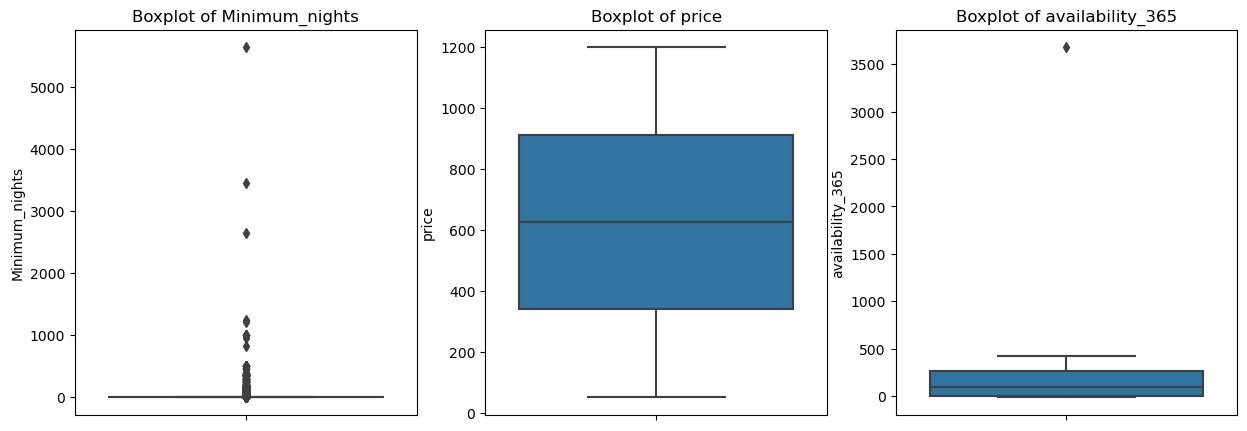

In [172]:
columns_to_check = ["Minimum_nights", "price", "availability_365"]

# Plot boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sb.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


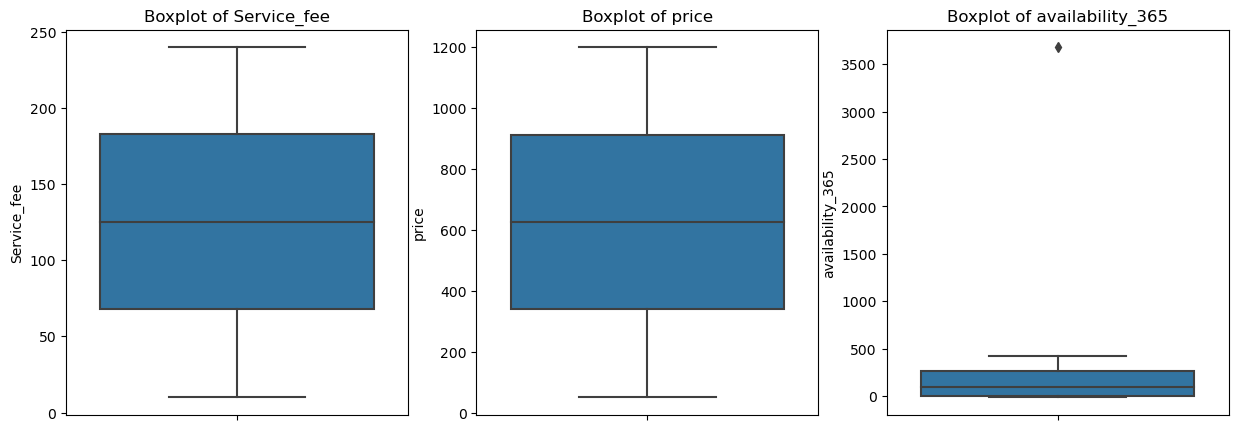

In [173]:
columns_to_check = ["Service_fee", "price", "availability_365"]

# Plot boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sb.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


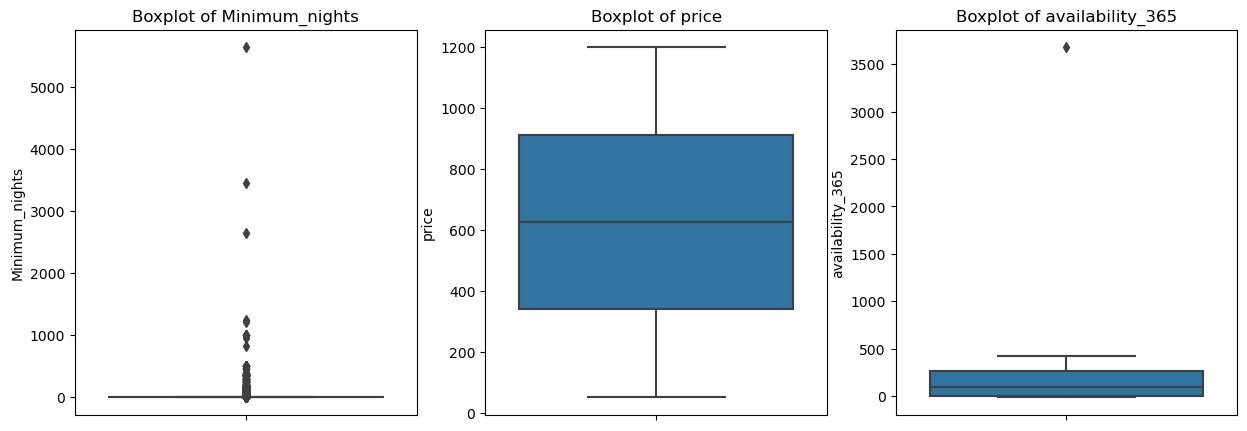

In [174]:
columns_to_check = ["Minimum_nights", "price", "availability_365"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sb.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.show()


In [175]:
df.Minimum_nights.unique()

<IntegerArray>
[ 10,  30,   3,  45,   2,   1,   5,   4,  90,   7,
 ...
 129, 145,  64, 364, 333, 119, 125,  34, 458, 825]
Length: 141, dtype: Int64

In [176]:
df.availability_365.unique()

array([ 286,  228,  352,  289,  374,  224,  219,  180,  375,    1,  163,
        258,   47,   68,  100,  197,   96,  325,  345,  347,  193,   54,
          9,  344,  372,  103,  172,   56,  105,  169,  383,  411,   76,
        416,  294,  214,  356,  110,  354,   33,  405,   86,  152,  353,
         26,   32,   85,    0,   82,  201,  328,  393,   61,  267,  189,
         83,  400,   34,  203,   35,  280,  417,  162,  242,  227,  173,
        146,  243,  425,  113,  260,  395,  266,   58,  410,  388,   13,
         62,  366,  334,   92,  -10,  378,   -2,  351,  389,   16,  166,
         18,  130,   43,  373,  426,  396,  419,  190,  335,   52,   70,
        141,   -1,  263,  200,  144,  320,   19,  293,  240,  300,  332,
        271,  156,  420,  138,  327,  361,  341,  213,  137,  336,   23,
         78,  188,  338,   66,  322,   80,  382,  386,  109,   12,  319,
         50,  118,  350,  150,  313,  248,  230,  145,  407,  422,   46,
        101,  210,  104,  206,  295,  397,  276,  3

In [177]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability_365', 'house_rules'],
      dtype='object')

In [178]:
# Convert to string, remove '-' sign, and convert back to integer
df['availability_365'] = df['availability_365'].astype(str).str.replace("-", "").astype(int)

# Check data type to confirm it's integer
print(df['availability_365'].dtype)  # Should print: int64


int32


In [179]:
df.availability_365.unique()

array([ 286,  228,  352,  289,  374,  224,  219,  180,  375,    1,  163,
        258,   47,   68,  100,  197,   96,  325,  345,  347,  193,   54,
          9,  344,  372,  103,  172,   56,  105,  169,  383,  411,   76,
        416,  294,  214,  356,  110,  354,   33,  405,   86,  152,  353,
         26,   32,   85,    0,   82,  201,  328,  393,   61,  267,  189,
         83,  400,   34,  203,   35,  280,  417,  162,  242,  227,  173,
        146,  243,  425,  113,  260,  395,  266,   58,  410,  388,   13,
         62,  366,  334,   92,   10,  378,    2,  351,  389,   16,  166,
         18,  130,   43,  373,  426,  396,  419,  190,  335,   52,   70,
        141,  263,  200,  144,  320,   19,  293,  240,  300,  332,  271,
        156,  420,  138,  327,  361,  341,  213,  137,  336,   23,   78,
        188,  338,   66,  322,   80,  382,  386,  109,   12,  319,   50,
        118,  350,  150,  313,  248,  230,  145,  407,  422,   46,  101,
        210,  104,  206,  295,  397,  276,  398,  1

In [180]:
df.availability_365.unique()

array([ 286,  228,  352,  289,  374,  224,  219,  180,  375,    1,  163,
        258,   47,   68,  100,  197,   96,  325,  345,  347,  193,   54,
          9,  344,  372,  103,  172,   56,  105,  169,  383,  411,   76,
        416,  294,  214,  356,  110,  354,   33,  405,   86,  152,  353,
         26,   32,   85,    0,   82,  201,  328,  393,   61,  267,  189,
         83,  400,   34,  203,   35,  280,  417,  162,  242,  227,  173,
        146,  243,  425,  113,  260,  395,  266,   58,  410,  388,   13,
         62,  366,  334,   92,   10,  378,    2,  351,  389,   16,  166,
         18,  130,   43,  373,  426,  396,  419,  190,  335,   52,   70,
        141,  263,  200,  144,  320,   19,  293,  240,  300,  332,  271,
        156,  420,  138,  327,  361,  341,  213,  137,  336,   23,   78,
        188,  338,   66,  322,   80,  382,  386,  109,   12,  319,   50,
        118,  350,  150,  313,  248,  230,  145,  407,  422,   46,  101,
        210,  104,  206,  295,  397,  276,  398,  1

In [181]:
df=df.rename(columns={'availability_365': 'availability_in_days'})

In [182]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_Identity_Verified', 'host_name',
       'Neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'Country_code', 'instant_bookable', 'cancellation_policy', 'Room_type',
       'Construction_year', 'price', 'Service_fee', 'Minimum_nights',
       'No_of_reviews', 'Last_review', 'Ratings',
       'calculated_host_listings_count', 'availability_in_days',
       'house_rules'],
      dtype='object')

# Analysis

## Descriptive Analysis

In [183]:
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 101545 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              101545 non-null  int64  
 1   Name                            101545 non-null  object 
 2   Host_id                         101545 non-null  int64  
 3   Host_Identity_Verified          101545 non-null  object 
 4   host_name                       101545 non-null  object 
 5   Neighbourhood_group             101545 non-null  object 
 6   neighbourhood                   101545 non-null  object 
 7   lat                             101537 non-null  float64
 8   long                            101537 non-null  float64
 9   country                         101545 non-null  object 
 10  Country_code                    101545 non-null  object 
 11  instant_bookable                101545 non-null  bool   
 12  cancel

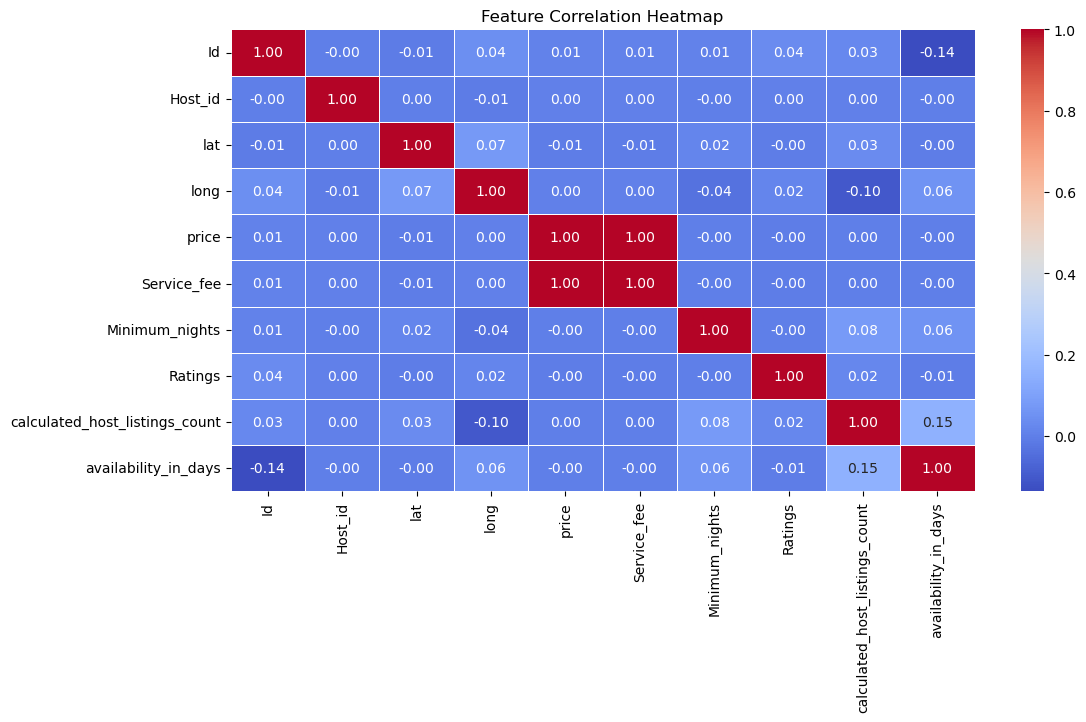

In [184]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()


plt.figure(figsize=(12,6))
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### 1. Low Correlation Among Variables – Most correlations are close to zero, indicating weak relationships among features.

### 2. Price & Service Fee – These two are highly correlated (correlation = 1.0), suggesting that service fees may be directly proportional to prices.

### 3. Availability & Host Listings Count – A slight positive correlation (0.15) suggests that hosts with more listings tend to have higher availability.

### 4. No Strong Correlation with Ratings – Ratings show no significant correlation with other variables, indicating guest satisfaction may be influenced by subjective factors not captured in the dataset.

### 5. Latitude and Longitude – Geographical features have no significant impact on other features, but spatial analysis might provide more insights.

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

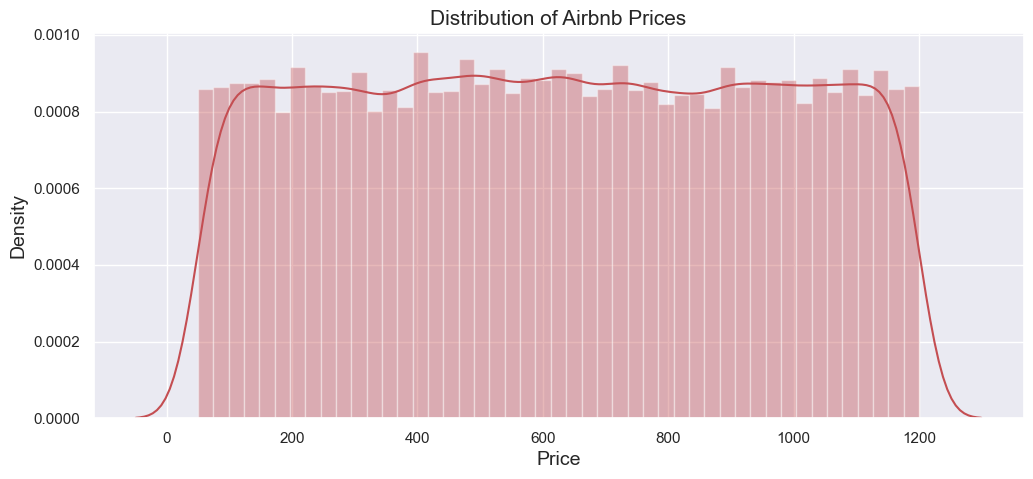

In [185]:
plt.figure(figsize=(12, 5))
sb.set_theme(style='darkgrid')
sb.distplot(df['price'],color=('r'))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15)

Uniform Distribution:

Prices are fairly evenly distributed across the range, suggesting a wide variety of pricing options for different budgets.
Low and High Prices Present:

There is a significant presence of both low-cost and high-end listings, indicating diverse offerings from budget to luxury stays.
Density Peaks Around Middle Range:

The density curve shows a slight concentration around the mid-range prices, implying moderate pricing is more common.
No Extreme Outliers:

There are no obvious extreme spikes or drops, indicating a relatively balanced price range without severe anomalies.

# Demographic Analysis 
## 1. Listings by Neighborhood_group

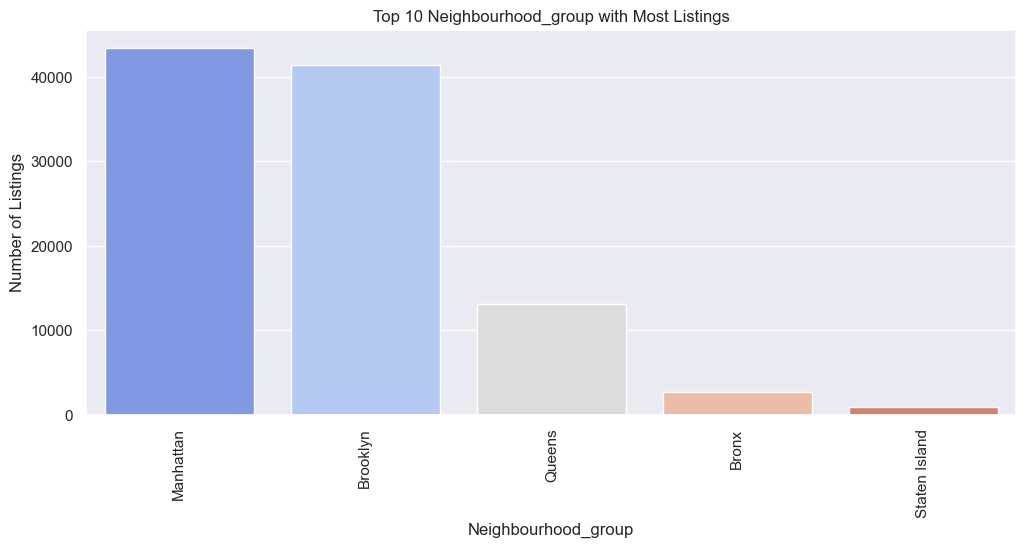

In [186]:
# Listings Count Per Neighborhood_group
plt.figure(figsize=(12,5))
top_neighborhoods = df["Neighbourhood_group"].value_counts().head(10)
sb.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette="coolwarm")
plt.title("Top 10 Neighbourhood_group with Most Listings")
plt.xlabel("Neighbourhood_group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.show()

### The two neighbourhoods with the most listings—Manhattan and Brooklyn—are far more numerous than the others. 

### Despite having a significant number of listings, Queens is a distant third compared to Manhattan and Brooklyn.

### Staten Island and the Bronx Have Very Few Listings: In comparison to the top three, these localities have a lot less listings.

### Skewed Distribution: The bulk of listings are found in Manhattan and Brooklyn, suggesting that there is more supply or demand in these locations.

Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

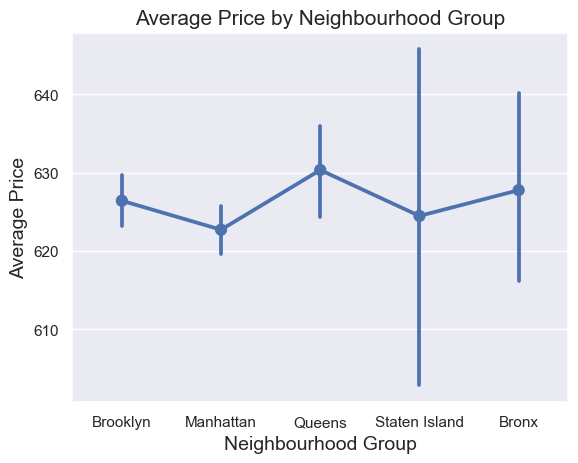

In [187]:
# Average Price by Neighborhood_group
from statistics import mean

# Create the point plot
sb.pointplot(x = 'Neighbourhood_group', y='price', data=df, estimator = np.mean)

# Add axis labels and a title
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

### 1. Price Variation:
###  Queens has the highest average price, followed by Bronx and Brooklyn.
### Manhattan has comparatively lower average prices, which is unexpected and might need further analysis.

### 2. High Variability in Staten Island:
### Staten Island shows significant price variability, indicating the presence of both luxury and budget listings.

### 3. Consistent Prices in Brooklyn and Manhattan:
### Prices in Brooklyn and Manhattan are relatively stable with minimal variation.

## Listing per Neighborhood

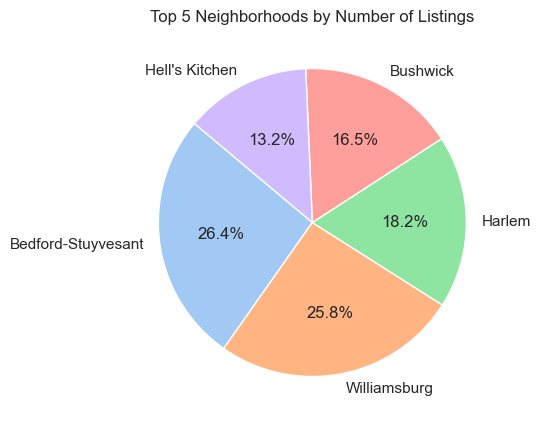

In [188]:
plt.figure(figsize=(5, 5))
top_neighborhoods = df["neighbourhood"].value_counts().head(5)  
plt.pie(top_neighborhoods, labels=top_neighborhoods.index, autopct="%1.1f%%", colors=sb.color_palette("pastel"), startangle=140)
plt.title("Top 5 Neighborhoods by Number of Listings")
plt.show()

### Key Insights from Top 5 Neighborhoods by Number of Listings:
### 1. Bedford-Stuyvesant & Williamsburg Lead – These two neighborhoods contribute the most listings (26.4% and 25.8%, respectively), indicating high Airbnb activity.

### 2. Harlem & Bushwick Are Also Popular – They account for 18.2% and 16.5% of listings, suggesting significant Airbnb presence.

### 3. Hell’s Kitchen Has the Fewest Listings – Among the top 5, it has the lowest share (13.2%), but still a notable Airbnb presence.

### 4. Market Dynamics – High listing concentration in Bedford-Stuyvesant and Williamsburg might indicate competitive pricing, higher availability, and potential regulatory focus.

## Average Price per Neighborhood

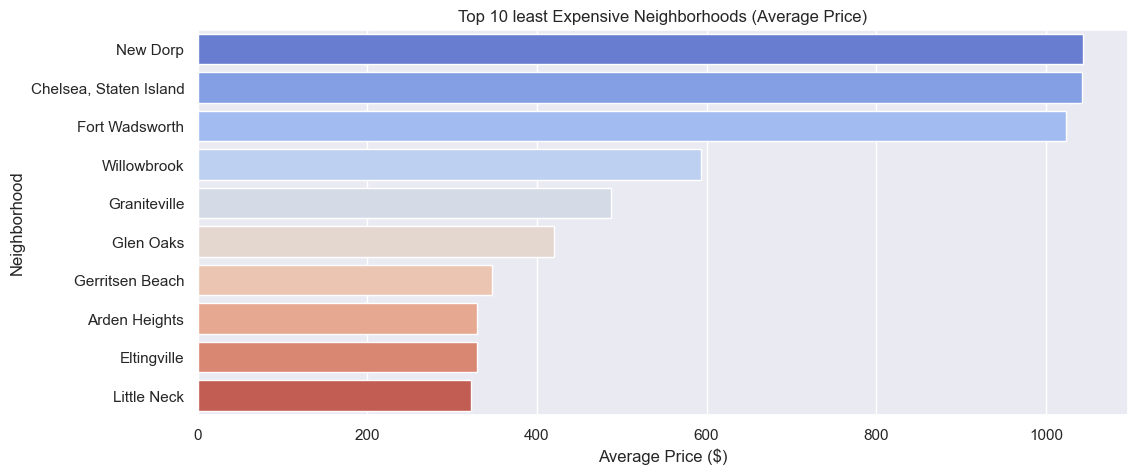

In [189]:
plt.figure(figsize=(12,5))
avg_price_neigh = df.groupby("neighbourhood")["price"].min().sort_values(ascending=False).head(10)

sb.barplot(x=avg_price_neigh.values, y=avg_price_neigh.index, palette="coolwarm")

plt.title("Top 10 least Expensive Neighborhoods (Average Price)")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighborhood")
plt.show()


### Key Insights from the Top 10 Most Expensive Neighborhoods (Average Price):
### 1. New Dorp & Chelsea (Staten Island) Are the Most Expensive – These neighborhoods have the highest average prices, exceeding 1,000(dollars) per night.

### 2. Fort Wadsworth Follows Closely – This area also has high prices, indicating luxury rentals or limited supply.

### 3. Mix of Staten Island & Queens Neighborhoods – Several neighborhoods in Staten Island and Queens dominate the list, suggesting premium listings in less central areas.

### 4. Price Variation – The lower-ranked neighborhoods (e.g., Mill Basin, Riverdale) still have high average prices, around $800+, making them relatively expensive but slightly more affordable.

## Availability per Neighborhood

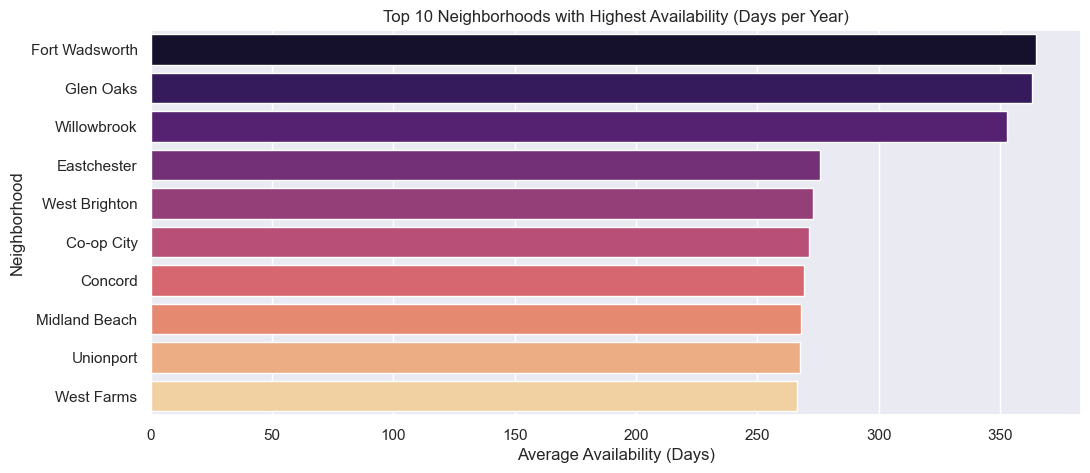

In [190]:
plt.figure(figsize=(12,5))
avg_availability = df.groupby("neighbourhood")["availability_in_days"].mean().sort_values(ascending=False).head(10)

sb.barplot(x=avg_availability.values, y=avg_availability.index, palette="magma")

plt.title("Top 10 Neighborhoods with Highest Availability (Days per Year)")
plt.xlabel("Average Availability (Days)")
plt.ylabel("Neighborhood")
plt.show()

### 1. Fort Wadsworth Leads – It has the highest availability, indicating a potential oversupply or fewer bookings.

### 2. Consistent High Availability – Glen Oaks and Willowbrook also show prolonged availability, suggesting similar trends of low occupancy or high supply.

### 3. Potential Demand Issues – Eastchester, West Brighton, and Co-op City have moderate availability, which may indicate seasonal demand variations.

### 4. Operational Strategy – For property owners, targeting neighborhoods with high availability for promotions or price reductions might improve occupancy rates.

### 5. Further Analysis Needed – Evaluating booking patterns and pricing could provide more insights into why these neighborhoods have high availability.

## Neighborhood-wise Ratings

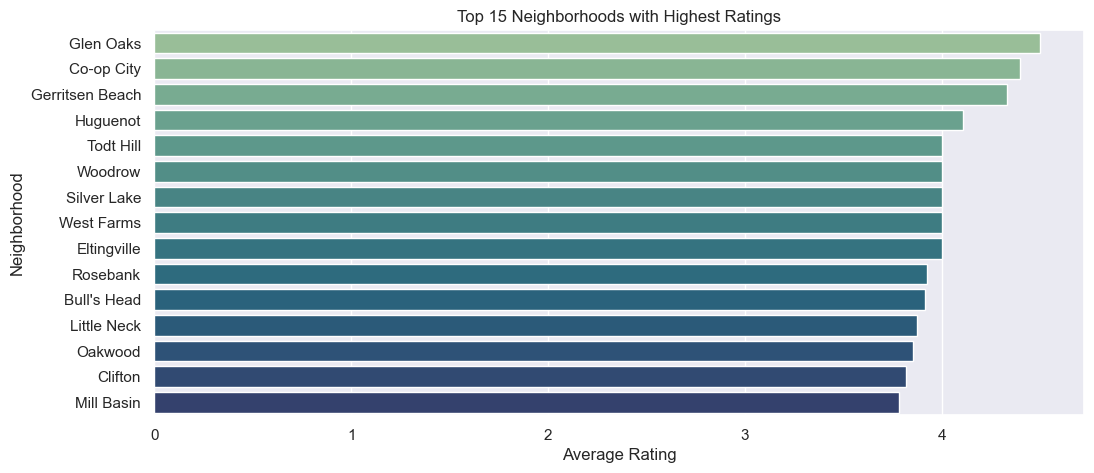

In [191]:
plt.figure(figsize=(12,5))
avg_ratings = df.groupby("neighbourhood")["Ratings"].mean().sort_values(ascending=False).head(15)

sb.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="crest")

plt.title("Top 15 Neighborhoods with Highest Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Neighborhood")
plt.show()

### Key Insights from Neighborhood Ratings Chart:
### 1. High-Quality Experiences – Glen Oaks and Co-op City have the highest ratings, suggesting excellent guest experiences and satisfaction.

### 2. Consistency in Ratings – The majority of neighborhoods maintain high ratings, likely due to good host management and guest satisfaction.

### 3. Potential for Growth – Neighborhoods like Mill Basin and Clifton, although still highly rated, could focus on minor improvements to further enhance guest experience.

### 4. Market Positioning – Property owners in these areas can use their high ratings as a competitive advantage when marketing their listings.


## Top 10 Listings with Best Ratings (Including Neighborhood and Their Neighborhood_group Info)

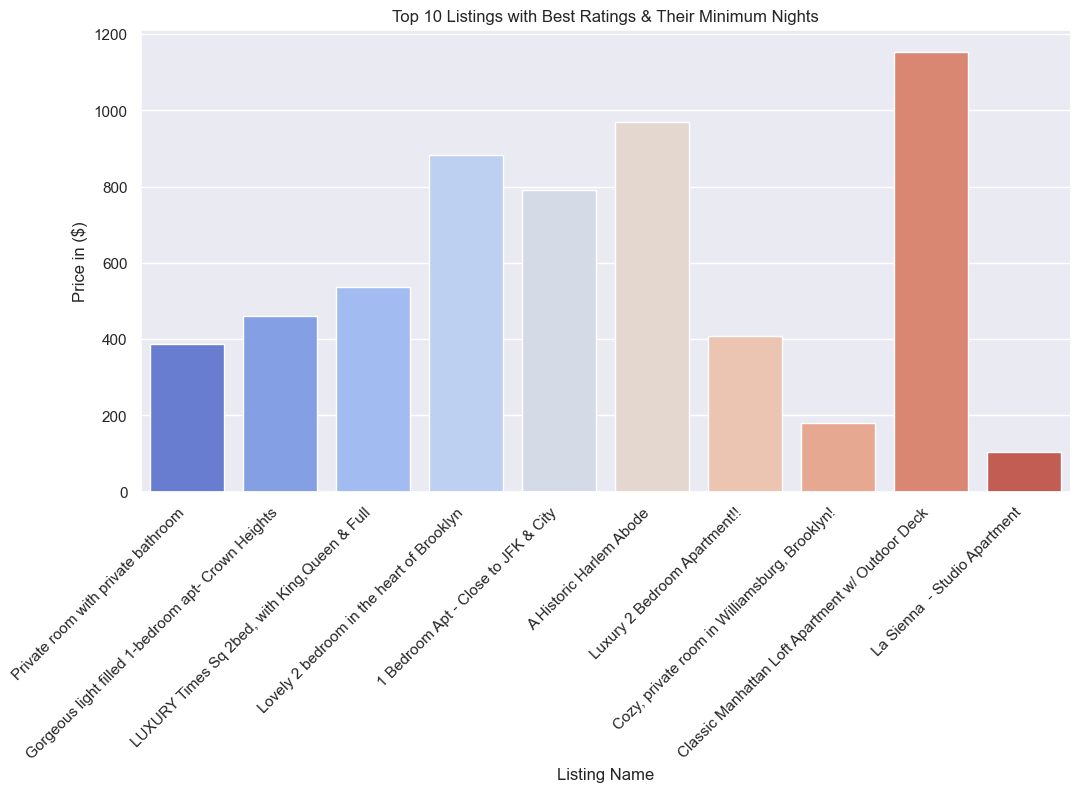

,Name,price,Ratings,Minimum_nights,availability_in_days,neighbourhood,Neighbourhood_group
19180,Private room with private bathroom,388,5,2,89,Greenpoint,Brooklyn
61707,Gorgeous light filled 1-bedroom apt- Crown Hei...,462,5,30,207,Crown Heights,Brooklyn
22685,"LUXURY Times Sq 2bed, with King,Queen & Full",537,5,1,253,Hell's Kitchen,Manhattan
61763,Lovely 2 bedroom in the heart of Brooklyn,883,5,2,213,Crown Heights,Brooklyn
61764,1 Bedroom Apt - Close to JFK & City,791,5,30,104,East New York,Brooklyn
61769,A Historic Harlem Abode,969,5,30,240,East Harlem,Manhattan
22679,Luxury 2 Bedroom Apartment!!,408,5,3,244,Financial District,Manhattan
22678,"Cozy, private room in Williamsburg, Brooklyn!",180,5,1,78,Williamsburg,Brooklyn
61779,Classic Manhattan Loft Apartment w/ Outdoor Deck,1154,5,14,221,Greenwich Village,Manhattan
61780,La Sienna - Studio Apartment,103,5,3,200,Harlem,Manhattan


In [192]:
# Filter data: Keep only rows with valid ratings, sort by Ratings, and select top 10
top_rated = df.dropna(subset=["Ratings"]).sort_values(by="Ratings", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sb.barplot(x=top_rated["Name"], y=top_rated["price"], palette="coolwarm")

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Listings with Best Ratings & Their Minimum Nights")
plt.xlabel("Listing Name")
plt.ylabel("Price in ($)")

plt.show()

top_rated[["Name","price" ,"Ratings", "Minimum_nights","availability_in_days", "neighbourhood", "Neighbourhood_group"]]


## Price Variation:

### Prices for highly-rated listings vary significantly, from 103(dollar) to 1154(dollar).
### High-end listings like the "Classic Manhattan Loft" and "A Historic Harlem Abode" cater to luxury travelers, while budget-friendly options like "La Sienna - Studio Apartment" are also available.

## Minimum Night Requirements:
### Listings have diverse minimum stay policies, ranging from 1 night to 30 nights.
### Properties with higher prices often require longer stays.

## Neighborhood Preferences:

### Manhattan and Brooklyn dominate the top-rated listings, indicating these areas are popular and well-reviewed.
### Crown Heights and Harlem are well-represented for both budget and luxury travelers.

## Availability:
### Some listings have high availability (200+ days per year), especially in more residential neighborhoods.
### Lower availability may suggest exclusivity or popularity for short-term bookings.

## Market Positioning:
### Budget travelers can target listings like "La Sienna - Studio Apartment" while luxury travelers may prefer "Classic Manhattan Loft."
### Hosts in premium locations could justify higher prices with additional amenities or luxury experiences.

## 2 .Listings by Room Type


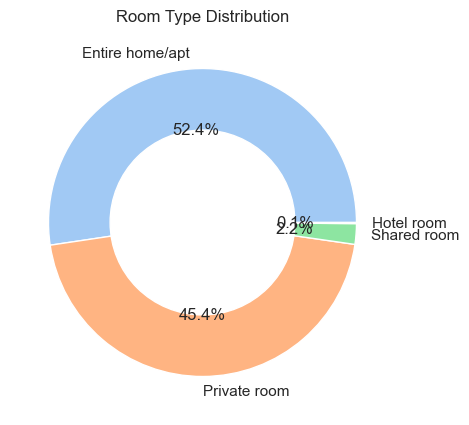

In [193]:
#Room Type Distribution
plt.figure(figsize=(8, 5))
sizes = df["Room_type"].value_counts()
colors = sb.color_palette("pastel")
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%", colors=colors, wedgeprops={"edgecolor": "white"})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white"))  # Create the donut hole
plt.title("Room Type Distribution")
plt.show()

### Key Insights from the Room Type Distribution Chart:

### Entire Home/Apt Dominates (52.4%) – Most listings are full apartments or homes, indicating a focus on vacation rentals rather than shared spaces.

### Private Rooms Are Also Popular (45.4%) – A significant portion of listings are private rooms, likely targeting budget travelers or shared living arrangements.

### Shared Rooms & Hotel Rooms Are Rare (<2.3%) – Very few listings are shared rooms or hotel-style accommodations, showing a preference for private stays.

### Implication for Travelers – Travelers have a nearly even split between renting an entire place and a private room, with limited shared or hotel-style options.

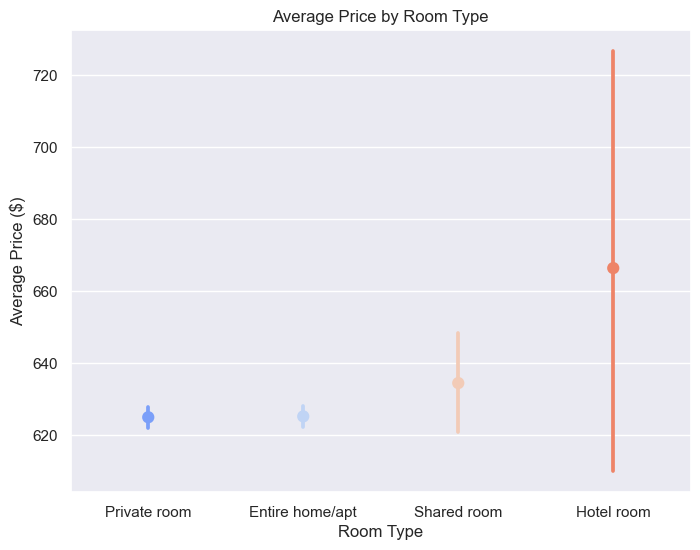

In [194]:
#Room Type vs Price
plt.figure(figsize=(8, 6))
sb.pointplot(x="Room_type", y="price", data=df, estimator=np.mean, palette="coolwarm")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()


### Key Insights from the Average Price by Room Type Chart:

### 1. Hotel Rooms Have High Price Variability – Hotel rooms show the widest price range, with prices varying significantly.

### 2. Private Rooms & Entire Homes Have Similar Prices – Their average prices are close, suggesting comparable affordability.

### 3. Shared Rooms Are Slightly More Expensive – The average price is a bit higher than private rooms, possibly due to premium shared accommodations.

### 4. Hotel Rooms Are the Most Expensive on Average – Despite high variability, hotels tend to have the highest average price.

## Most Reviewed Room Types in Each Neighbourhood Group

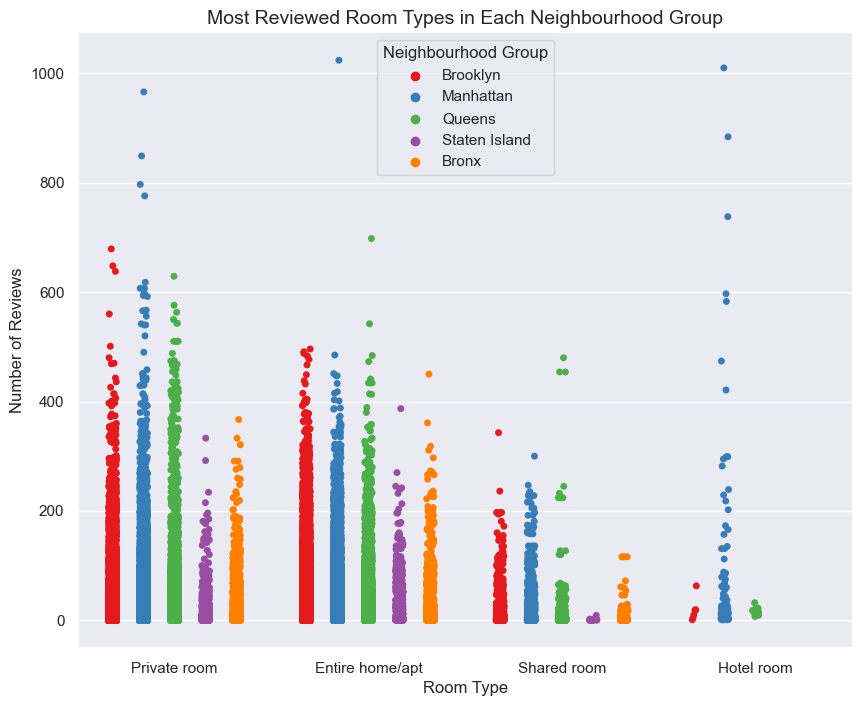

In [195]:
df['No_of_reviews'] = pd.to_numeric(df['No_of_reviews'], errors='coerce')
df_cleaned = df.dropna(subset=['No_of_reviews'])

# Plot using stripplot
plt.figure(figsize=(10, 8))
ax = sb.stripplot(x='Room_type', y='No_of_reviews', hue='Neighbourhood_group', dodge=True, data=df_cleaned, palette='Set1')

# Set plot title and labels
ax.set_title('Most Reviewed Room Types in Each Neighbourhood Group', fontsize=14)
ax.set_xlabel('Room Type')
ax.set_ylabel('Number of Reviews')

plt.legend(title='Neighbourhood Group')
plt.show()


### 1. Private Rooms are Popular:
### Private rooms have the most reviews across all neighborhood groups, indicating they are a preferred choice for travelers.

### 2. Entire Homes/Apartments Follow Closely:
### Entire homes/apartments also receive significant reviews, especially in tourist-heavy areas like Manhattan and Brooklyn.

### 3. Hotel Rooms Have Fewer Reviews:
### Hotel rooms have relatively lower review counts, suggesting travelers may prefer more personalized or affordable lodging options.

### 4. Shared Rooms are Less Preferred:
### Shared rooms have the least reviews, indicating they are not a popular choice except for budget-conscious travelers.

### 4. Neighborhood-Specific Preference:
### Manhattan dominates in reviews for hotel rooms and entire apartments, while Brooklyn and Queens show more activity in private room rentals.

## Host Identity & host Analysis

#### Top Hosts With More Listing/Property using Bar chart

Text(0.5, 1.0, 'Top 10 hosts on the basis of no of listings')

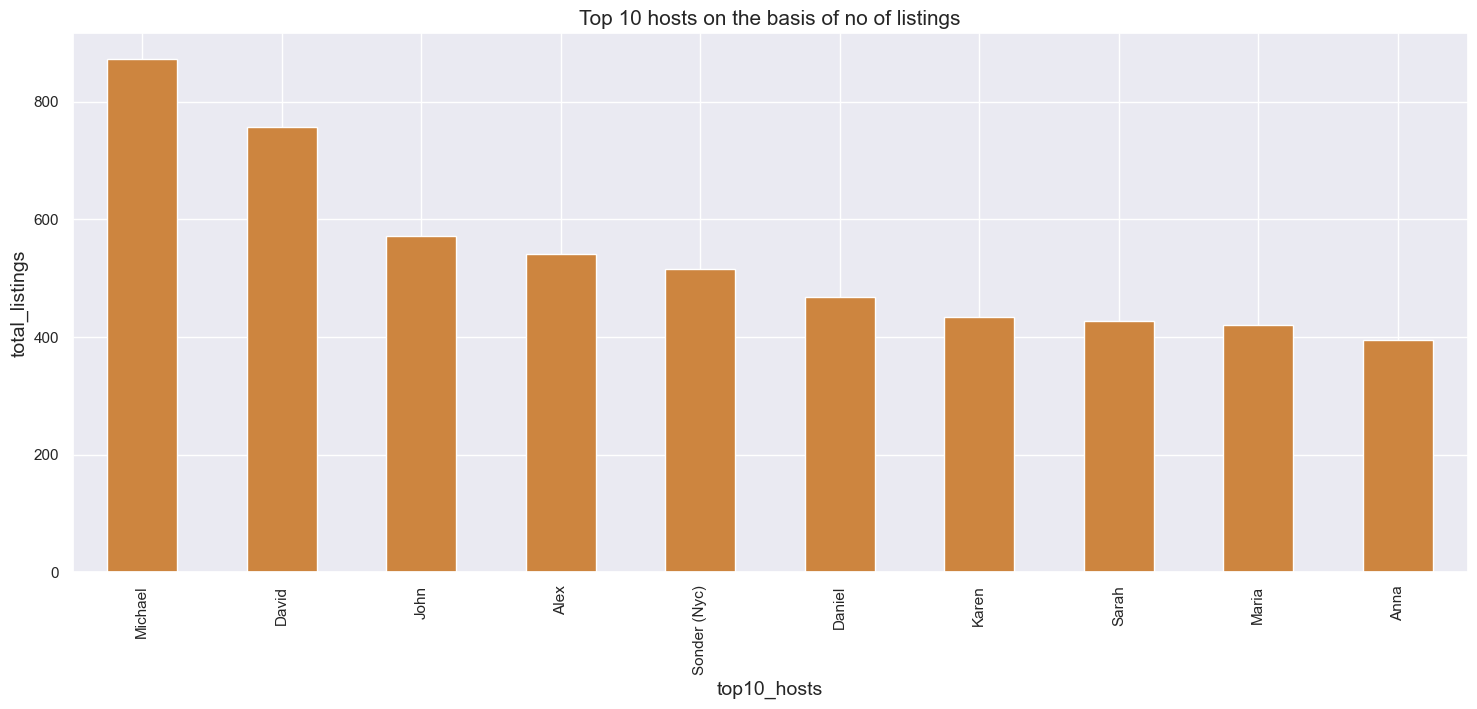

In [196]:
top_hosts = df['host_name'].value_counts()[:10]

# Create a bar plot of the top 10 hosts
top_hosts.plot(kind='bar', color='peru', figsize=(18, 7))
plt.xlabel('top10_hosts', fontsize=14)
plt.ylabel('total_listings', fontsize=14)
plt.title('Top 10 hosts on the basis of no of listings', fontsize=15)

## Observations -->

### The top three hosts in terms of total listings are Michael, David, and John, who have 383, 368, and 276 listings, respectively.

## Number Of Active Hosts Per Neighborhood_Group Using Line Chart

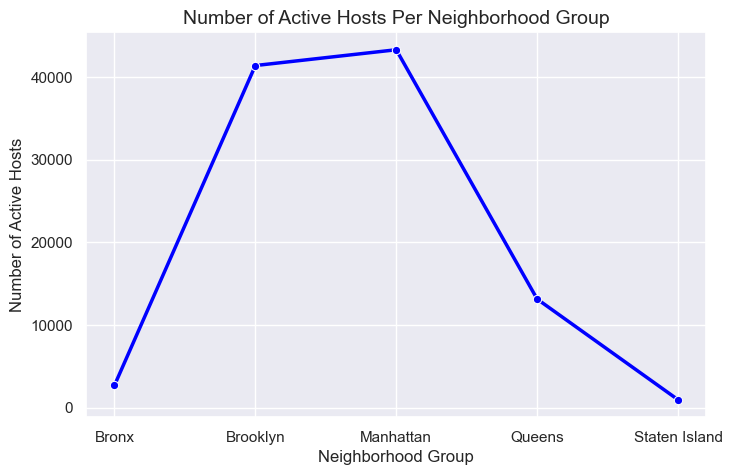

In [197]:
active_hosts = df.groupby('Neighbourhood_group')['Host_id'].nunique().reset_index()

# Plotting using line chart
plt.figure(figsize=(8, 5))
sb.lineplot(x='Neighbourhood_group', y='Host_id', data=active_hosts, marker='o', linewidth=2.5, color='blue')
plt.title('Number of Active Hosts Per Neighborhood Group', fontsize=14)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Number of Active Hosts', fontsize=12)
plt.grid(True)

plt.show()


In [198]:
hosts_per_location = df.groupby('Neighbourhood_group')['Id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']
hosts_per_location


,Neighbourhood_Groups,Host_counts
0,Bronx,2679
1,Brooklyn,41434
2,Manhattan,43346
3,Queens,13141
4,Staten Island,945


### 1.Manhattan and Brooklyn Dominate:
### Manhattan and Brooklyn have the highest number of active hosts, indicating a higher supply of rental properties.

### 2. Queens in Third Place:
### Queens has a moderate number of hosts compared to Manhattan and Brooklyn, suggesting it may be a growing market or preferred for budget travelers.

### 3. Low Activity in Staten Island and Bronx:
### Staten Island and the Bronx have significantly fewer active hosts, indicating lower demand or limited availability of rental properties.

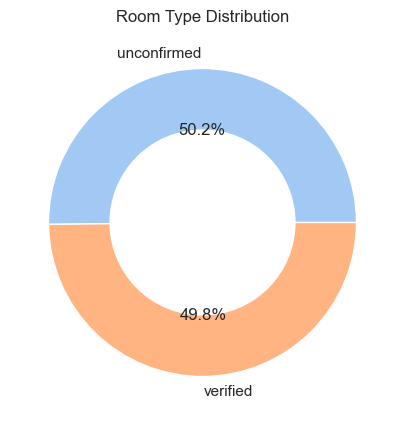

In [199]:
#ROOM TYPE DISTRIBUTION
plt.figure(figsize=(8, 5))
sizes = df["Host_Identity_Verified"].value_counts()
colors = sb.color_palette("pastel")
plt.pie(sizes, labels=sizes.index, autopct="%1.1f%%", colors=colors, wedgeprops={"edgecolor": "white"})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc="white"))  # Create the donut hole
plt.title("Room Type Distribution")
plt.show()

### Key Insights from Host Identity Verification Status Chart:
### 1. Nearly Equal Distribution – The number of verified and unconfirmed hosts is almost the same.

### 2. Many Hosts Are Not Verified – A large portion of hosts operate without identity verification, which may raise trust concerns.

### 3. Potential Trust Factor for Guests – Guests may prefer verified hosts for security and reliability.

### 4. Platform Policy Implications – The platform could encourage more verifications to build trust and safety.

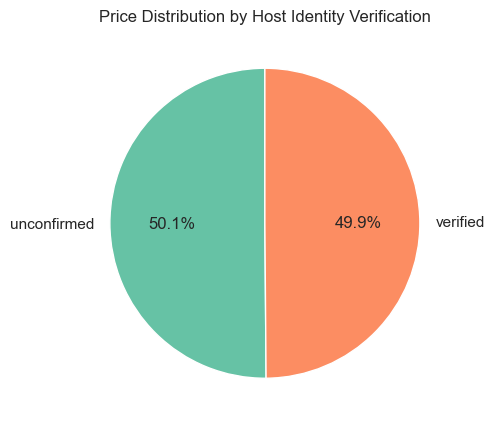

In [200]:
#Host_Identity_Verified Vs Price
price_distribution = df.groupby("Host_Identity_Verified")["price"].mean()
colors = ["#66c2a5", "#fc8d62"]

plt.figure(figsize=(5,7))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Price Distribution by Host Identity Verification")
plt.show()


### Key Insights from Price Distribution by Host Verification Chart:

### 1. Similar Price Ranges – Both verified and unconfirmed hosts have similar price distributions.

### 2. Wide Price Variability – Prices range from very low to very high, indicating diverse listings in both categories.

### 3. No Clear Pricing Advantage for Verification – Verification does not seem to significantly impact the price of listings.

### 4. Trust vs. Price Tradeoff – Guests might prefer verified hosts for trust reasons, even though prices remain comparable.

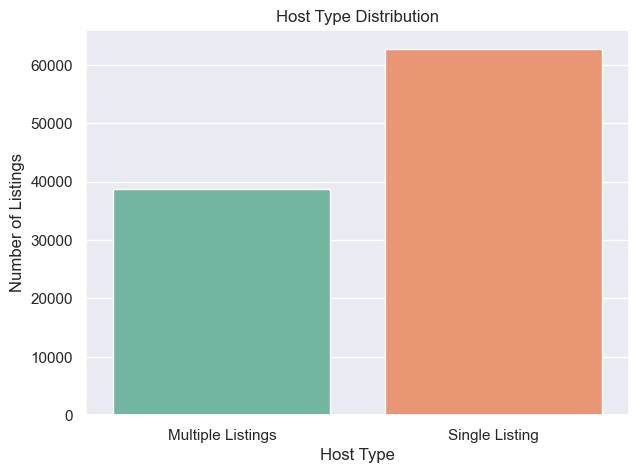

In [201]:
#Percentage of Listings by Host Type
plt.figure(figsize=(7,5))
df["Host_type"] = df["calculated_host_listings_count"].apply(lambda x: "Multiple Listings" if x > 1 else "Single Listing")
sb.countplot(x="Host_type", data=df, palette="Set2")
plt.title("Host Type Distribution")
plt.xlabel("Host Type")
plt.ylabel("Number of Listings")
plt.show()


### Key Insights from Host Type Distribution Chart:

### 1. Single Listing Hosts Dominate – The majority of hosts (over 60,000) manage only one listing, indicating a large number of casual or individual hosts.

### 2. Multiple Listing Hosts Are Significant – Around 40,000 listings belong to hosts with multiple properties, suggesting a substantial segment of professional or commercial hosts.

### 3. Market Implication – While Airbnb still has a strong presence of individual hosts, a significant portion of the market is controlled by professional operators.

### 4. Potential Impact on Pricing & Availability – Multiple listing hosts may operate as businesses, potentially influencing pricing strategies and higher availability.

### Host Identity Verification vs. Ratings 

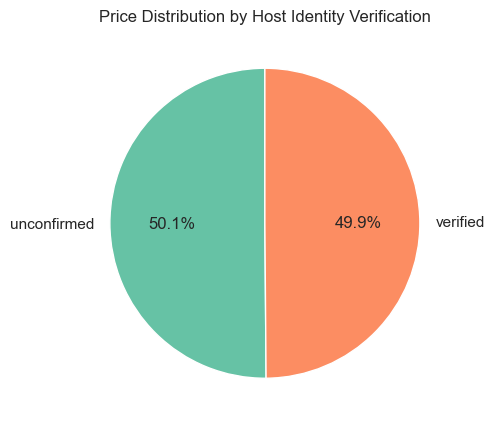

In [202]:
rat = df.groupby("Host_Identity_Verified")["Ratings"].mean()
colors = ["#66c2a5", "#fc8d62"]

plt.figure(figsize=(5,7))
plt.pie(price_distribution, labels=price_distribution.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Price Distribution by Host Identity Verification")
plt.show()


## Balanced Distribution:

### The price distribution between verified and unconfirmed hosts is almost equal, with unconfirmed hosts slightly higher at 50.1% and verified hosts at 49.9%.

## Availability Patterns Across Locations


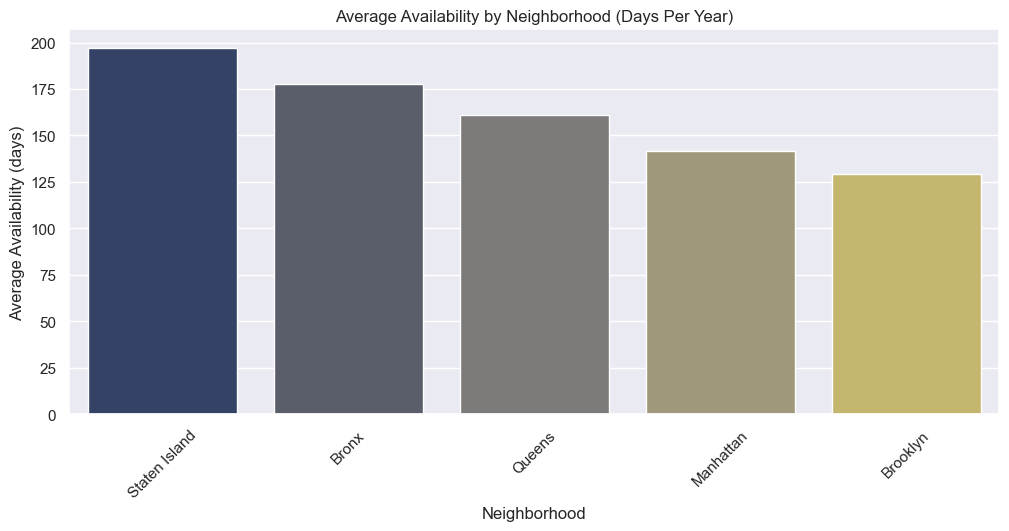

In [203]:
#Availability Per Neighborhood
plt.figure(figsize=(12,5))
availability_by_neighborhood = df.groupby("Neighbourhood_group")["availability_in_days"].mean().sort_values(ascending=False)
sb.barplot(x=availability_by_neighborhood.index, y=availability_by_neighborhood.values, palette="cividis")
plt.title("Average Availability by Neighborhood (Days Per Year)")
plt.xlabel("Neighborhood")
plt.ylabel("Average Availability (days)")
plt.xticks(rotation=45)
plt.show()



### Key Insights from Average Availability by Neighborhood Chart:

### 1. Staten Island Has the Highest Availability – Listings in Staten Island are available for nearly 200 days per year, the highest among neighborhoods.

### 2. Brooklyn Has the Lowest Availability – Brooklyn's listings are available for the least number of days, suggesting either higher occupancy or more restrictions.

### 3. General Trend – Availability tends to be higher in less central boroughs (Staten Island, Bronx) and lower in high-demand areas (Manhattan, Brooklyn).

### 4. Market Implications – Hosts in areas with lower availability might experience more demand per available day, potentially allowing for higher prices.

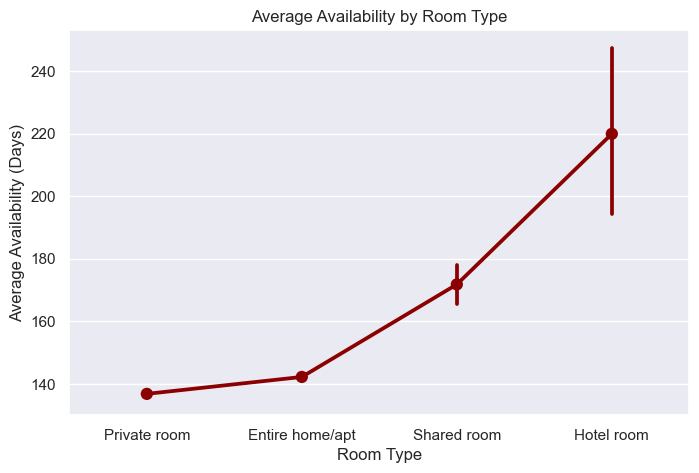

In [204]:
#Availability by Room Type
plt.figure(figsize=(8,5))
sb.pointplot(x="Room_type", y="availability_in_days", data=df, estimator=np.mean, color="darkred", markers="o", linestyles="-")
plt.title("Average Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days)")
plt.show()

### Key Insights from Average Availability by Room Type Chart:

### 1. Hotel Rooms Have the Highest Availability – Hotels are available for over 220 days per year, significantly more than other room types.

### 2. Private Rooms Have the Lowest Availability – Private rooms are available for around 135-140 days per year, indicating lower availability compared to other categories.

### 3. Gradual Increase in Availability – Availability increases progressively from private rooms to hotel rooms, likely due to professional hosting and fewer personal usage restrictions.

### 4. Market Implications – Higher availability for hotel rooms and shared rooms may indicate commercial operations, while lower availability for private rooms suggests more part-time hosts.

## Cancellation Policy Analysis

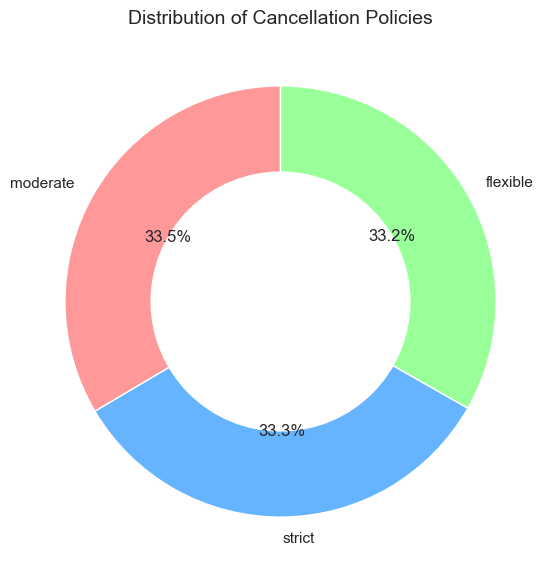

In [205]:
df_filtered = df[df["cancellation_policy"] != "Not_Mentioned"]


policy_counts = df_filtered["cancellation_policy"].value_counts()

colors = ["#ff9999", "#66b3ff", "#99ff99"]  
plt.figure(figsize=(7, 7))
plt.pie(policy_counts, labels=policy_counts.index, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0, 0), 0.60, fc="white")
plt.gca().add_artist(centre_circle)
plt.title("Distribution of Cancellation Policies", fontsize=14)
plt.show()


## Even Distribution:

### . The three types of cancellation policies (Flexible, Moderate, and Strict) are almost evenly distributed.
### . Moderate policies are slightly more popular at 33.5%, followed by Strict at 33.3% and Flexible at 33.2%.

## Balanced Preferences:
### . Guests and hosts seem to prefer a mix of policies, indicating a balanced market.
### . Some users may prioritize flexibility, while others prefer security with stricter terms.

## Host Strategy:
### . Hosts offering Moderate policies may attract more bookings due to a balanced approach that benefits both parties.

## Construction_Year Analysis
## Distribution of Listings by Construction Year

### Line Graph for Price Trends by Construction Year

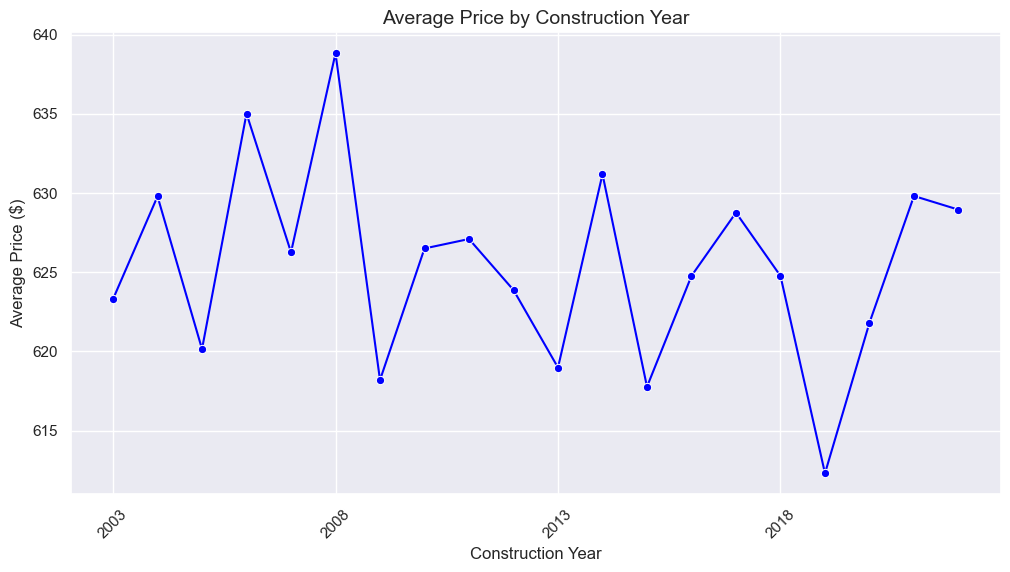

In [206]:
df["Construction_year"] = pd.to_numeric(df["Construction_year"], errors='coerce')
df = df.dropna(subset=["Construction_year"])
df["Construction_year"] = df["Construction_year"].astype(int)

avg_price_by_year = df.groupby("Construction_year")["price"].mean()
plt.figure(figsize=(12,6))
sb.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker="o", color="blue")
plt.title("Average Price by Construction Year", fontsize=14)
plt.xlabel("Construction Year", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.grid(True)
plt.xticks(np.arange(df["Construction_year"].min(), df["Construction_year"].max(), step=5), rotation=45)

plt.show()



### 1. Fluctuations in Price:
### The average price shows frequent fluctuations with no consistent upward or downward trend.

### 2. Peak in 2008:
### The highest average price was observed around 2008, likely due to favorable market conditions or new developments.

### 3. Dip in 2019:
### A noticeable drop in average price is visible around 2019, possibly due to external factors like economic slowdown or policy changes.

### 4. Stabilization:
### After 2020, prices appear to stabilize within a certain range, indicating a balanced market.

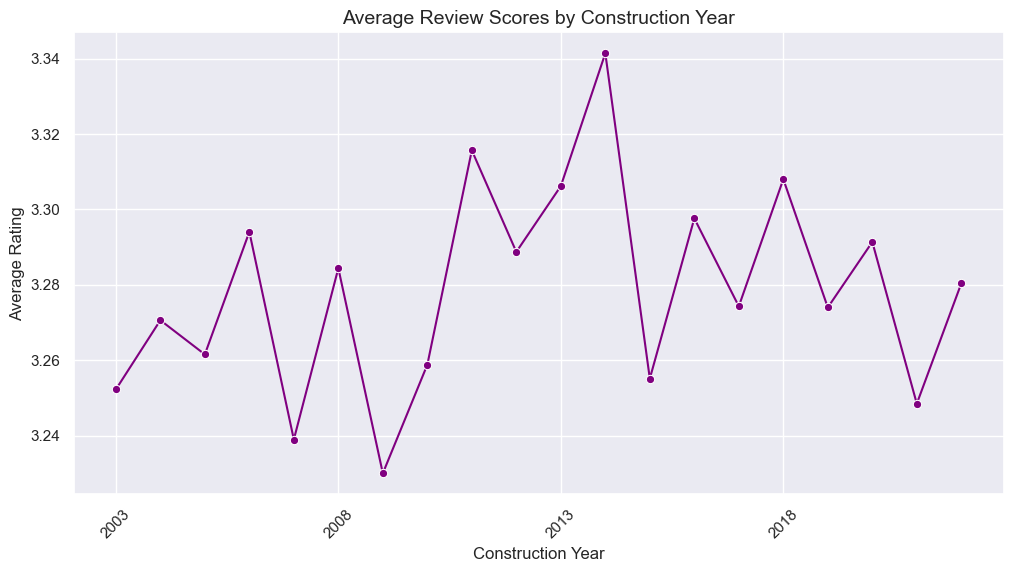

In [207]:
# Construction year vs Rating
avg_rating_by_year = df.groupby("Construction_year")["Ratings"].mean()
plt.figure(figsize=(12,6))
sb.lineplot(x=avg_rating_by_year.index, y=avg_rating_by_year.values, marker="o", color="purple")
plt.title("Average Review Scores by Construction Year", fontsize=14)
plt.xlabel("Construction Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

# Formatting for better readability
plt.grid(True)
plt.xticks(np.arange(df["Construction_year"].min(), df["Construction_year"].max(), step=5), rotation=45)

plt.show()



### 1. Slight Increase in Ratings:
### Over the years, the average review scores have shown a slight upward trend, indicating possible improvements in quality or services.

### 2. Fluctuations in Reviews:
### There are periodic dips and spikes in the average review scores, suggesting inconsistencies in customer satisfaction.

### 3. Peak Around 2014:
### The highest review scores were observed around 2014, indicating a period of high customer satisfaction.

### 4. Sudden Drops:
### Significant drops in ratings in certain years may indicate temporary issues like poor service, negative experiences, or external factors.

In [208]:

df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,Id,Name,Host_id,Host_Identity_Verified,host_name,Neighbourhood_group,neighbourhood,lat,long,country,Country_code,instant_bookable,cancellation_policy,Room_type,Construction_year,price,Service_fee,Minimum_nights,No_of_reviews,Last_review,Ratings,calculated_host_listings_count,availability_in_days,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020,966,193,10,9.0,2021-10-19 00:00:00,4,6,286,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007,142,28,30,45.0,2022-05-21 00:00:00,4,2,228,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005,620,124,3,0.0,No Reviews,5,1,352,"I encourage you to use my kitchen, cooking and..."
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009,204,41,10,9.0,2018-11-19 00:00:00,3,1,289,"Please no smoking in the house, porch or on th..."
4,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013,577,115,3,74.0,2019-06-22 00:00:00,3,1,374,"No smoking, please, and no drugs."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101358,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,US,True,moderate,Private room,Unknown,696,139,7,12.0,2019-03-27 00:00:00,5,1,0,Shoes off Clean After yourself Turn Lights and...
101359,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,Unknown,909,181,1,19.0,2017-08-31 00:00:00,3,2,0,#NAME?
101360,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,Unknown,387,77,2,50.0,2019-06-26 00:00:00,4,2,235,* Check out: 10am * We made an effort to keep ...
101361,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,Unknown,848,169,2,0.0,No Reviews,1,1,0,Each of us is working and/or going to school a...


In [209]:
df_cleaned.to_excel('cleaned_airbnb_data.xlsx', index=False)
print("File saved as 'cleaned_airbnb_data.xlsx'")


File saved as 'cleaned_airbnb_data.xlsx'


In [210]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\Sahil bopche\ML_Codons\Practice
